# Portfolio Optimization & Investment Recommendation
## 1. Data Exploration & Preprocessing
First, we explores and preprocesses the market data and customer profiles for portfolio optimization.

In [1]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from typing import Dict, List, Tuple
import logging

# Create output directory for plots
if not os.path.exists('plots'):
    os.makedirs('plots')

# Set style for better visualizations
sns.set_theme(style="darkgrid", palette="husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### 1.1. Examine the Data
#### 1.1.1. Loading and Examining Market Data
Let's examine the historical stock data for major tech companies to understand their performance patterns.

In [2]:
print("1. Loading and Examining Market Data...")
# Load market data for each stock
stocks = ['Apple', 'Microsoft', 'Google', 'Amazon', 'Netflix']
market_data = {}

for stock in stocks:
    df = pd.read_csv(f'data/{stock}.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    market_data[stock] = df
    print(f"\n{stock} Data Shape:", df.shape)
    print(f"\n{stock} Data Sample:")
    print(df.head())

print("\n2. Calculating Returns and Volatility...")
# Calculate daily returns and volatility for each stock
returns_data = {}
volatility_data = {}

for stock, data in market_data.items():
    # Calculate daily returns
    returns = data['Adj Close'].pct_change()
    returns_data[stock] = returns
    
    # Calculate 20-day rolling volatility
    volatility = returns.rolling(window=20).std() * np.sqrt(252)  # Annualized volatility
    volatility_data[stock] = volatility
    
    print(f"\n{stock} Statistics:")
    print(f"Average Daily Return: {returns.mean():.4f}")
    print(f"Annualized Volatility: {volatility.mean():.4f}")

1. Loading and Examining Market Data...

Apple Data Shape: (5839, 6)

Apple Data Sample:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850643  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778926  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721931  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756127  460734400

Microsoft Data Shape: (5839, 6)

Microsoft Data Sample:
                Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-01-03  58.68750  59.3125  56.00000  58.28125  36.361576  53228400
2000-01-04  56.78125  58.5625  56.12500  56.31250  35.133263  54119000
2000-01-05  55.56250  58.1875  54.68750  56.90625  35.50371


3. Creating Market Data Visualizations...


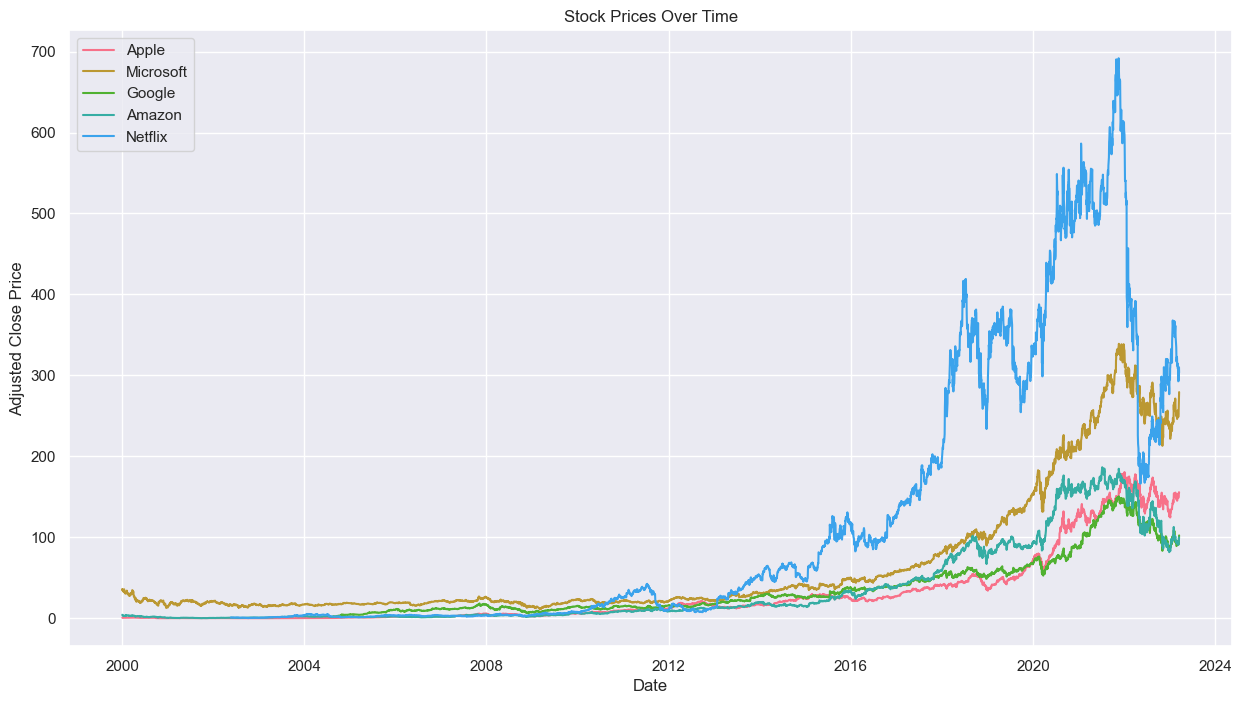

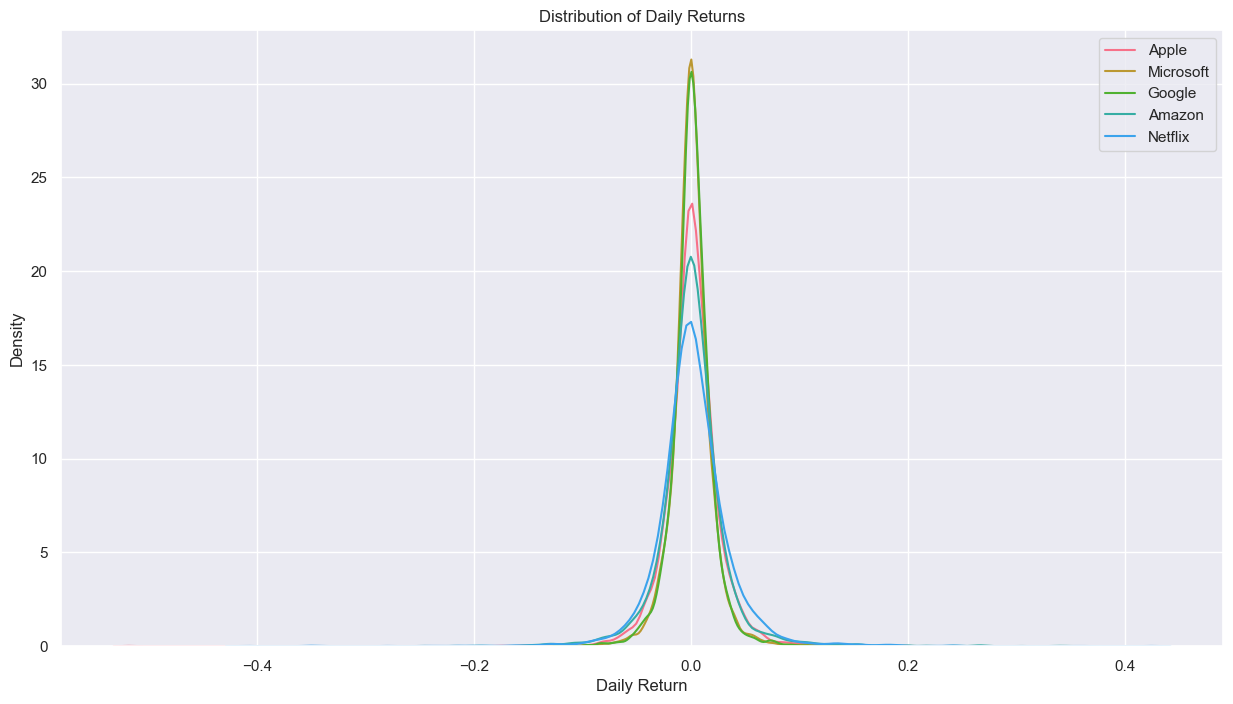

In [3]:
print("\n3. Creating Market Data Visualizations...")
# Plot stock prices over time
plt.figure(figsize=(15, 8))
for stock, data in market_data.items():
    plt.plot(data.index, data['Adj Close'], label=stock)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot returns distribution
plt.figure(figsize=(15, 8))
for stock, returns in returns_data.items():
    sns.kdeplot(returns, label=stock)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#### 1.1.2. Loading and Examining Customer Data
Then, we examine the customer data


4. Loading and Examining Customer Data...
Customer Data Shape: (1000, 7)

Customer Data Sample:
   customer_id  age  income risk_tolerance investment_horizon  \
0            1   52  120532            Low          Long-term   
1            2   42   95065            Low          Long-term   
2            3   54   61686            Low        Medium-term   
3            4   67   43327            Low        Medium-term   
4            5   41   84890           High         Short-term   

   investment_goal  current_portfolio_value  
0    Home Purchase                   897457  
1       Retirement                   396486  
2    Home Purchase                   710572  
3  Wealth Building                    19637  
4  Wealth Building                   839690  

Customer Data Statistics:
       customer_id          age         income  current_portfolio_value
count  1000.000000  1000.000000    1000.000000              1000.000000
mean    500.500000    44.904000   70310.411000            507544.

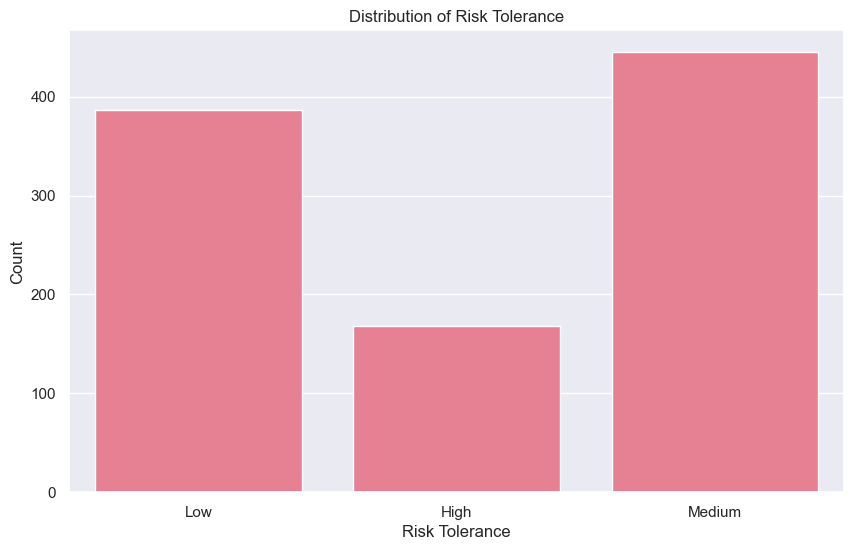

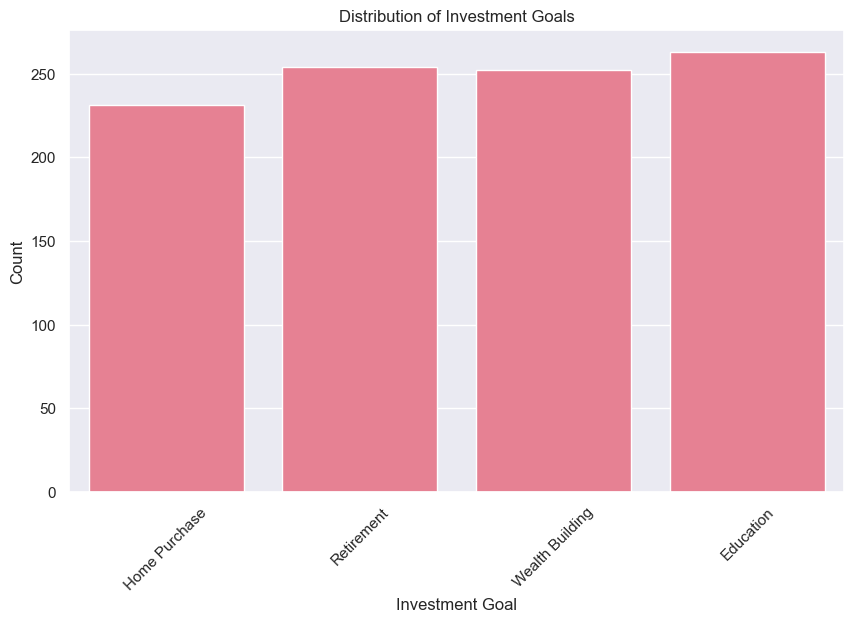

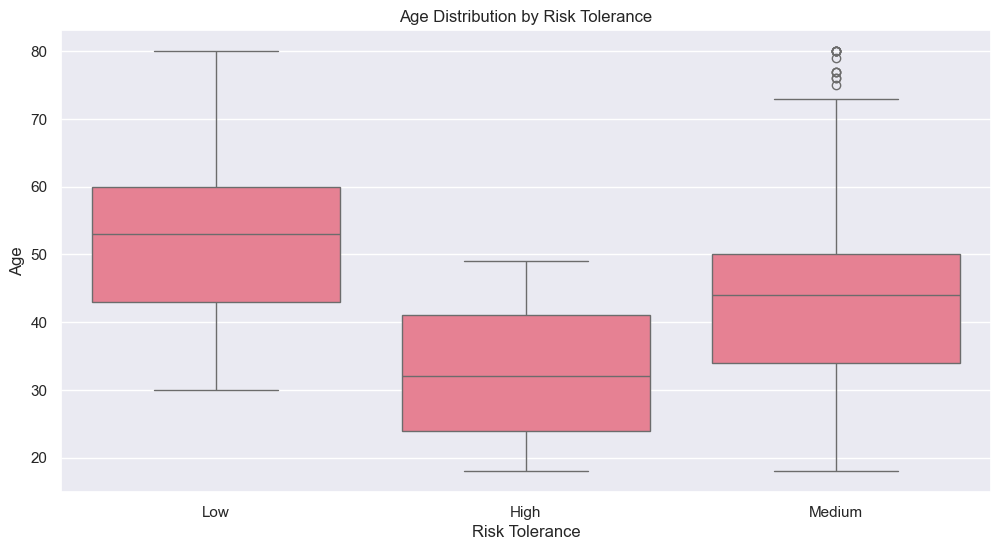

In [4]:
print("\n4. Loading and Examining Customer Data...")
# Load customer profiles
customer_data = pd.read_csv('data/customer_profiles.csv')

print("Customer Data Shape:", customer_data.shape)
print("\nCustomer Data Sample:")
print(customer_data.head())

print("\nCustomer Data Statistics:")
print(customer_data.describe())

print("\n5. Creating Customer Data Visualizations...")
# Visualize risk tolerance distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='risk_tolerance')
plt.title('Distribution of Risk Tolerance')
plt.xlabel('Risk Tolerance')
plt.ylabel('Count')
plt.show()

# Visualize investment goals
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='investment_goal')
plt.title('Distribution of Investment Goals')
plt.xlabel('Investment Goal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze relationship between age and risk tolerance
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_data, x='risk_tolerance', y='age')
plt.title('Age Distribution by Risk Tolerance')
plt.xlabel('Risk Tolerance')
plt.ylabel('Age')
plt.show()

In [5]:
# Print summary statistics
print("\nSummary Customer Data Statistics:")

print("\nRisk Tolerance Distribution:")
print(customer_data['risk_tolerance'].value_counts())
print("\nInvestment Goals Distribution:")
print(customer_data['investment_goal'].value_counts())
print("\nAge Statistics:")
print(customer_data['age'].describe()) 


Summary Customer Data Statistics:

Risk Tolerance Distribution:
risk_tolerance
Medium    445
Low       387
High      168
Name: count, dtype: int64

Investment Goals Distribution:
investment_goal
Education          263
Retirement         254
Wealth Building    252
Home Purchase      231
Name: count, dtype: int64

Age Statistics:
count    1000.000000
mean       44.904000
std        14.178639
min        18.000000
25%        35.000000
50%        45.000000
75%        54.000000
max        80.000000
Name: age, dtype: float64


##### Customer Data Overview:
The dataset contains 1000 customer profiles with 7 features
Features include: customer_id, age, income, risk_tolerance, investment_horizon, investment_goal, and current_portfolio_value
##### Risk Tolerance Distribution:
- Medium risk tolerance: 445 customers (44.5%)
- Low risk tolerance: 387 customers (38.7%)
- High risk tolerance: 168 customers (16.8%)
##### Investment Goals Distribution:
- Education: 263 customers (26.3%)
- Retirement: 254 customers (25.4%)
- Wealth Building: 252 customers (25.2%)
- Home Purchase: 231 customers (23.1%)
##### Age Statistics:
- Mean age: 44.9 years
- Median age: 45 years
- Age range: 18-80 years
- Standard deviation: 14.2 years
##### Key Visualizations:
- Distribution of risk tolerance levels
- Distribution of investment goals
- Age distribution by risk tolerance level
##### Notable Patterns:
- Most customers have medium to low risk tolerance
- Investment goals are fairly evenly distributed
- Age distribution shows a normal distribution centered around 45 years
- There appears to be some correlation between age and risk tolerance
##### Data Quality:
- The data appears to be well-structured and complete
- No obvious missing values or anomalies
- Reasonable distributions for numerical variable

### 1.2. Data Cleaning

In [6]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def clean_market_data(market_data: Dict[str, pd.DataFrame]) -> Dict[str, pd.DataFrame]:
    """
    Clean and preprocess market data for multiple stocks.
    
    Args:
        market_data (Dict[str, pd.DataFrame]): Dictionary of stock dataframes
        
    Returns:
        Dict[str, pd.DataFrame]: Dictionary of cleaned stock dataframes
    """
    cleaned_data = {}
    
    for stock_name, df in market_data.items():
        logger.info(f"Cleaning market data for {stock_name}")
        
        # Make a copy to avoid modifying original data
        df_clean = df.copy()
        
        # 1. Handle missing values
        # Forward fill for price data
        price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
        df_clean[price_columns] = df_clean[price_columns].fillna(method='ffill')
        
        # Fill remaining missing values with backward fill
        df_clean[price_columns] = df_clean[price_columns].fillna(method='bfill')
        
        # Fill volume missing values with 0
        df_clean['Volume'] = df_clean['Volume'].fillna(0)
        
        # 2. Calculate returns and volatility
        df_clean['Daily_Return'] = df_clean['Adj Close'].pct_change()
        df_clean['Volatility_20d'] = df_clean['Daily_Return'].rolling(window=20).std() * np.sqrt(252)
        
        # 3. Remove outliers using IQR method
        for col in price_columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with NaN and then forward fill
            df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = np.nan
            df_clean[col] = df_clean[col].fillna(method='ffill')
        
        # 4. Ensure data is sorted by date
        df_clean = df_clean.sort_index()
        
        # 5. Remove any remaining NaN values
        df_clean = df_clean.dropna()
        
        cleaned_data[stock_name] = df_clean
        
    return cleaned_data

def clean_customer_data(customer_data: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and preprocess customer profile data.
    
    Args:
        customer_data (pd.DataFrame): Customer profile dataframe
        
    Returns:
        pd.DataFrame: Cleaned customer profile dataframe
    """
    logger.info("Cleaning customer data")
    
    # Make a copy to avoid modifying original data
    df_clean = customer_data.copy()
    
    # 1. Handle missing values
    # Fill missing age with median
    df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
    
    # Fill missing income with median
    df_clean['income'] = df_clean['income'].fillna(df_clean['income'].median())
    
    # Fill missing portfolio value with median
    df_clean['current_portfolio_value'] = df_clean['current_portfolio_value'].fillna(
        df_clean['current_portfolio_value'].median()
    )
    
    # Fill categorical variables with mode
    categorical_columns = ['risk_tolerance', 'investment_horizon', 'investment_goal']
    for col in categorical_columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    # 2. Handle outliers
    # Remove unrealistic ages (below 18 or above 100)
    df_clean = df_clean[(df_clean['age'] >= 18) & (df_clean['age'] <= 100)]
    
    # Remove negative income or portfolio values
    df_clean = df_clean[(df_clean['income'] > 0) & (df_clean['current_portfolio_value'] > 0)]
    
    # 3. Standardize categorical variables
    df_clean['risk_tolerance'] = df_clean['risk_tolerance'].str.capitalize()
    df_clean['investment_horizon'] = df_clean['investment_horizon'].str.capitalize()
    df_clean['investment_goal'] = df_clean['investment_goal'].str.capitalize()
    
    return df_clean

def align_data_frequencies(market_data: Dict[str, pd.DataFrame], frequency: str = 'D') -> Dict[str, pd.DataFrame]:
    """
    Align all market data to the same frequency.
    
    Args:
        market_data (Dict[str, pd.DataFrame]): Dictionary of stock dataframes
        frequency (str): Target frequency ('D' for daily, 'M' for monthly, etc.)
        
    Returns:
        Dict[str, pd.DataFrame]: Dictionary of aligned stock dataframes
    """
    logger.info(f"Aligning market data to {frequency} frequency")
    
    aligned_data = {}
    
    for stock_name, df in market_data.items():
        # Resample data to target frequency
        df_aligned = df.resample(frequency).agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Adj Close': 'last',
            'Volume': 'sum',
            'Daily_Return': 'sum',
            'Volatility_20d': 'last'
        })
        
        aligned_data[stock_name] = df_aligned
    
    return aligned_data

def main():
    """
    Main function to demonstrate data cleaning process.
    """
    try:
        # Load market data
        stocks = ['Apple', 'Microsoft', 'Google', 'Amazon', 'Netflix']
        market_data = {}
        
        for stock in stocks:
            df = pd.read_csv(f'data/{stock}.csv')
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            market_data[stock] = df
        
        # Load customer data
        customer_data = pd.read_csv('data/customer_profiles.csv')
        
        # Clean market data
        cleaned_market_data = clean_market_data(market_data)
        
        # Clean customer data
        cleaned_customer_data = clean_customer_data(customer_data)
        
        # Align market data frequencies
        aligned_market_data = align_data_frequencies(cleaned_market_data, frequency='D')
        
        # Save cleaned data
        for stock_name, df in aligned_market_data.items():
            df.to_csv(f'data/cleaned_{stock_name}.csv')
        
        cleaned_customer_data.to_csv('data/cleaned_customer_profiles.csv', index=False)
        
        logger.info("Data cleaning completed successfully")
        
    except Exception as e:
        logger.error(f"Error during data cleaning: {str(e)}")
        raise

if __name__ == "__main__":
    main() 

2025-06-02 20:36:00,271 - INFO - Cleaning market data for Apple
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\3193231600.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[price_columns] = df_clean[price_columns].fillna(method='ffill')
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\3193231600.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[price_columns] = df_clean[price_columns].fillna(method='bfill')
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\3193231600.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col] = df_clean[col].fillna(method='ffill')
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\3193231600.py:48: FutureWarning: Series.fillna with 'method' is deprecated a

## 2. Feature Engineering
In this step, we create features that capture essential market characteristics and customer-specific features. 
### 2.1. Market Feature Engineering
- Use returns-based features for performance analysis
- Use volatility features for risk assessment
- Use technical indicators for trend analysis
- Use volume features for liquidity analysis

In [7]:
def calculate_market_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate market-specific features using cleaned data.
    """
    df_features = df.copy()
    
    # 1. Returns-based features
    df_features['daily_return'] = df_features['Adj Close'].pct_change()
    df_features['return_1w'] = df_features['Adj Close'].pct_change(5)
    df_features['return_1m'] = df_features['Adj Close'].pct_change(21)
    df_features['return_3m'] = df_features['Adj Close'].pct_change(63)
    df_features['return_1y'] = df_features['Adj Close'].pct_change(252)
    
    # 2. Volatility features
    df_features['volatility_20d'] = df_features['daily_return'].rolling(window=20).std() * np.sqrt(252)
    df_features['volatility_60d'] = df_features['daily_return'].rolling(window=60).std() * np.sqrt(252)
    df_features['volatility_120d'] = df_features['daily_return'].rolling(window=120).std() * np.sqrt(252)
    
    # 3. Moving averages
    df_features['sma_20'] = df_features['Adj Close'].rolling(window=20).mean()
    df_features['sma_50'] = df_features['Adj Close'].rolling(window=50).mean()
    df_features['sma_200'] = df_features['Adj Close'].rolling(window=200).mean()
    
    # 4. RSI
    delta = df_features['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df_features['rsi_14'] = 100 - (100 / (1 + rs))
    
    # 5. Volume features
    df_features['volume_sma_20'] = df_features['Volume'].rolling(window=20).mean()
    df_features['volume_ratio'] = df_features['Volume'] / df_features['volume_sma_20']
    
    # 6. Momentum
    df_features['momentum_1m'] = df_features['Adj Close'].pct_change(21)
    df_features['momentum_3m'] = df_features['Adj Close'].pct_change(63)
    
    return df_features

#### Returns-based Features
- **daily_return**: Daily percentage change in adjusted close price
  - Formula: `(current_price - previous_price) / previous_price`
  - Purpose: Captures short-term price movements

- **return_1w**: 5-day cumulative return
  - Formula: `(current_price - price_5_days_ago) / price_5_days_ago`
  - Purpose: Measures weekly performance

- **return_1m**: 21-day cumulative return
  - Formula: `(current_price - price_21_days_ago) / price_21_days_ago`
  - Purpose: Measures monthly performance

- **return_3m**: 63-day cumulative return
  - Formula: `(current_price - price_63_days_ago) / price_63_days_ago`
  - Purpose: Measures quarterly performance

- **return_1y**: 252-day cumulative return
  - Formula: `(current_price - price_252_days_ago) / price_252_days_ago`
  - Purpose: Measures annual performance

#### Volatility Features
- **volatility_20d**: 20-day rolling volatility
  - Formula: `std(daily_returns) * sqrt(252)`
  - Purpose: Measures short-term price stability

- **volatility_60d**: 60-day rolling volatility
  - Formula: `std(daily_returns) * sqrt(252)`
  - Purpose: Measures medium-term price stability

- **volatility_120d**: 120-day rolling volatility
  - Formula: `std(daily_returns) * sqrt(252)`
  - Purpose: Measures long-term price stability

#### Technical Indicators
- **sma_20**: 20-day Simple Moving Average
  - Formula: `mean(prices_last_20_days)`
  - Purpose: Identifies short-term trends

- **sma_50**: 50-day Simple Moving Average
  - Formula: `mean(prices_last_50_days)`
  - Purpose: Identifies medium-term trends

- **sma_200**: 200-day Simple Moving Average
  - Formula: `mean(prices_last_200_days)`
  - Purpose: Identifies long-term trends

- **rsi_14**: 14-day Relative Strength Index
  - Formula: `100 - (100 / (1 + RS))` where RS = avg_gain / avg_loss
  - Purpose: Measures overbought/oversold conditions

#### Volume Features
- **volume_sma_20**: 20-day average volume
  - Formula: `mean(volume_last_20_days)`
  - Purpose: Identifies normal trading activity

- **volume_ratio**: Current volume relative to 20-day average
  - Formula: `current_volume / volume_sma_20`
  - Purpose: Identifies unusual trading activity

In [8]:
def calculate_correlation_features(market_data: Dict[str, pd.DataFrame]) -> Dict[str, pd.DataFrame]:
    """
    Calculate correlation-based features between different assets.
    """
    # Create a DataFrame with returns for all assets
    returns_df = pd.DataFrame()
    for stock_name, df in market_data.items():
        returns_df[stock_name] = df['daily_return']
    
    # Calculate rolling correlations
    correlation_features = {}
    for stock_name in market_data.keys():
        df = market_data[stock_name].copy()
        
        # Calculate rolling correlations with other assets
        for other_stock in market_data.keys():
            if other_stock != stock_name:
                # Short-term correlation (20 days)
                df[f'corr_{other_stock}_20d'] = returns_df[stock_name].rolling(window=20).corr(returns_df[other_stock])
                # Medium-term correlation (60 days)
                df[f'corr_{other_stock}_60d'] = returns_df[stock_name].rolling(window=60).corr(returns_df[other_stock])
                # Long-term correlation (120 days)
                df[f'corr_{other_stock}_120d'] = returns_df[stock_name].rolling(window=120).corr(returns_df[other_stock])
        
        correlation_features[stock_name] = df
    
    return correlation_features

#### Correlation Features
- **corr_[stock]_20d**: 20-day rolling correlation with another stock
  - Formula: `rolling_corr(returns_stock1, returns_stock2, window=20)`
  - Purpose: Measures short-term relationship between assets
  - Example: `corr_Microsoft_20d` shows correlation between current stock and Microsoft over 20 days

- **corr_[stock]_60d**: 60-day rolling correlation with another stock
  - Formula: `rolling_corr(returns_stock1, returns_stock2, window=60)`
  - Purpose: Measures medium-term relationship between assets
  - Example: `corr_Apple_60d` shows correlation between current stock and Apple over 60 days

- **corr_[stock]_120d**: 120-day rolling correlation with another stock
  - Formula: `rolling_corr(returns_stock1, returns_stock2, window=120)`
  - Purpose: Measures long-term relationship between assets
  - Example: `corr_Google_120d` shows correlation between current stock and Google over 120 days

#### Correlation Feature Usage Guidelines
- Use short-term correlations (20d) for tactical asset allocation
- Use medium-term correlations (60d) for strategic portfolio adjustments
- Use long-term correlations (120d) for long-term portfolio planning
- Monitor correlation changes for portfolio rebalancing signals
- Use correlations to identify diversification opportunities

#### Correlation Interpretation
- Values range from -1 to 1
- 1: Perfect positive correlation
- 0: No correlation
- -1: Perfect negative correlation
- Generally:
  - '> 0.7: Strong positive correlation
  - 0.3 to 0.7: Moderate positive correlation
  - -0.3 to 0.3: Weak correlation
  - -0.7 to -0.3: Moderate negative correlation
  - < -0.7: Strong negative correlation

#### Correlation Feature Applications
1. **Portfolio Diversification**
   - Identify assets with low or negative correlations
   - Reduce portfolio risk through proper asset allocation
   - Monitor correlation changes for rebalancing opportunities

2. **Risk Management**
   - Assess portfolio concentration risk
   - Identify potential contagion effects
   - Monitor correlation breakdowns during market stress

3. **Trading Strategies**
   - Identify pairs trading opportunities
   - Monitor correlation-based signals
   - Implement correlation-based hedging strategies

4. **Market Analysis**
   - Understand sector relationships
   - Identify market regime changes
   - Monitor market integration/segmentation
### 2.2. Customer Feature Engineering
- Use risk profile features for risk assessment
- Use investment horizon features for time-based analysis
- Use financial health indicators for capacity analysis
- Use composite risk score for overall risk assessment

In [9]:
def calculate_customer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate customer-specific features using cleaned data.
    """
    df_features = df.copy()
    
    # 1. Risk Profile Features
    df_features['age_risk_factor'] = 1 - (df_features['age'] / 100)
    df_features['income_risk_capacity'] = df_features['income'] / df_features['income'].max()
    df_features['portfolio_concentration'] = df_features['current_portfolio_value'] / df_features['current_portfolio_value'].max()
    
    # 2. Investment Horizon Features
    horizon_map = {'Short-term': 1, 'Medium-term': 2, 'Long-term': 3}
    df_features['horizon_score'] = df_features['investment_horizon'].map(horizon_map)
    
    # 3. Risk Tolerance Score
    risk_map = {'Low': 1, 'Medium': 2, 'High': 3}
    df_features['risk_tolerance_score'] = df_features['risk_tolerance'].map(risk_map)
    
    # 4. Investment Goal Features
    goal_dummies = pd.get_dummies(df_features['investment_goal'], prefix='goal')
    df_features = pd.concat([df_features, goal_dummies], axis=1)
    
    # 5. Financial Health Indicators
    df_features['income_portfolio_ratio'] = df_features['income'] / df_features['current_portfolio_value']
    df_features['investment_capacity'] = df_features['income'] * df_features['horizon_score']
    
    # 6. Composite Risk Score
    df_features['composite_risk_score'] = (
        df_features['age_risk_factor'] * 0.3 +
        df_features['income_risk_capacity'] * 0.2 +
        df_features['risk_tolerance_score'] * 0.3 +
        df_features['horizon_score'] * 0.2
    )
    
    return df_features

#### Risk Profile Features
- **age_risk_factor**: Age-based risk factor
  - Formula: `1 - (age / 100)`
  - Purpose: Higher risk tolerance for younger investors

- **income_risk_capacity**: Normalized income
  - Formula: `income / max_income`
  - Purpose: Measures financial capacity for risk

- **portfolio_concentration**: Normalized portfolio value
  - Formula: `portfolio_value / max_portfolio_value`
  - Purpose: Measures investment concentration

#### Investment Horizon Features
- **horizon_score**: Numerical representation of investment horizon
  - Values: Short-term (1), Medium-term (2), Long-term (3)
  - Purpose: Quantifies investment time preference

#### Risk Tolerance Features
- **risk_tolerance_score**: Numerical representation of risk tolerance
  - Values: Low (1), Medium (2), High (3)
  - Purpose: Quantifies risk preference

#### Financial Health Indicators
- **income_portfolio_ratio**: Income to portfolio value ratio
  - Formula: `income / portfolio_value`
  - Purpose: Measures investment capacity relative to current portfolio

- **investment_capacity**: Combined income and horizon score
  - Formula: `income * horizon_score`
  - Purpose: Measures potential investment capacity

#### Composite Risk Score
- **composite_risk_score**: Weighted combination of risk factors
  - Formula: `(age_risk_factor * 0.3) + (income_risk_capacity * 0.2) + (risk_tolerance_score * 0.3) + (horizon_score * 0.2)`
  - Purpose: Overall risk profile assessment

In [10]:
def main():
    # Load cleaned market data
    market_data = {}
    stocks = ['Apple', 'Microsoft', 'Google', 'Amazon', 'Netflix']
    
    for stock in stocks:
        df = pd.read_csv(f'data/cleaned_{stock}.csv')
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        market_data[stock] = df
    
    # Calculate market features
    for stock in stocks:
        market_data[stock] = calculate_market_features(market_data[stock])
    
    # Calculate correlation features
    market_data = calculate_correlation_features(market_data)
    
    # Save updated market data with new features
    for stock in stocks:
        market_data[stock].to_csv(f'data/cleaned_{stock}.csv')
    
    # Load and process cleaned customer data
    customer_data = pd.read_csv('data/cleaned_customer_profiles.csv')
    customer_data = calculate_customer_features(customer_data)
    
    # Save updated customer data with new features
    customer_data.to_csv('data/cleaned_customer_profiles.csv', index=False)

if __name__ == "__main__":
    main()

C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\2673406073.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_features['daily_return'] = df_features['Adj Close'].pct_change()
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\2673406073.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_features['return_1w'] = df_features['Adj Close'].pct_change(5)
C:\Users\sghas\AppData\Local\Temp\ipykernel_3616\2673406073.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to callin

#### Data Quality Considerations
- All features are calculated using cleaned data
- Missing values are handled appropriately
- Outliers are addressed in the cleaning phase
- Features are normalized where appropriate

## 3. Model Development & Optimization 
Now, our datases are prepared and we can build a portfolio optimization model.

Loading market data...
Successfully loaded Apple data with shape: (8446, 36)
Successfully loaded Microsoft data with shape: (8446, 36)
Successfully loaded Google data with shape: (6756, 36)
Successfully loaded Amazon data with shape: (8446, 36)
Successfully loaded Netflix data with shape: (7575, 36)

Loading customer profiles...
Successfully loaded 25 customer profiles

Initializing optimizer...
Prepared returns data with shape: (6755, 5)

Processing customer 1 of 25...

Portfolio Recommendations for Customer 1:
------------------------
Age: 52
Risk Level: Low
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.60
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 6.00%
Amazon: 29.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.68%
Annual Volatility: 23.29%
Sharpe Ratio: 0.84

Plotting performance for Customer 1...


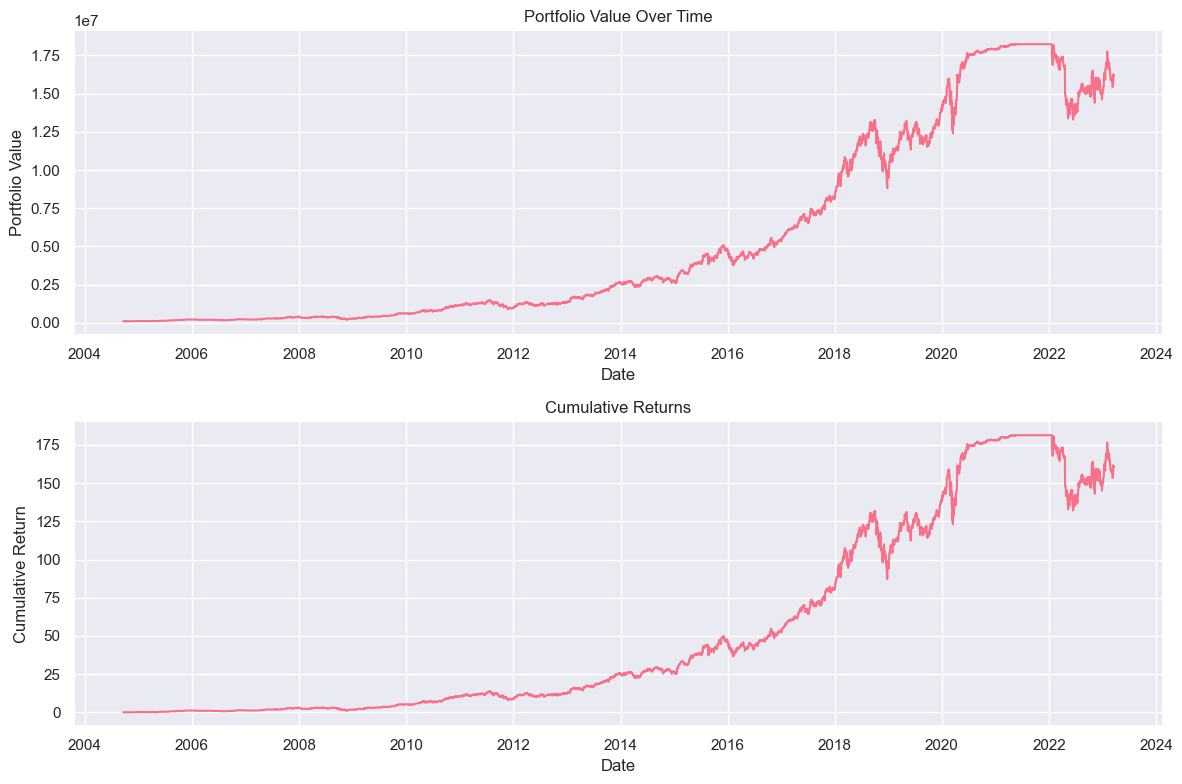


Processing customer 2 of 25...

Portfolio Recommendations for Customer 2:
------------------------
Age: 42
Risk Level: Low
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.60
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 6.00%
Amazon: 29.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.68%
Annual Volatility: 23.29%
Sharpe Ratio: 0.84

Plotting performance for Customer 2...


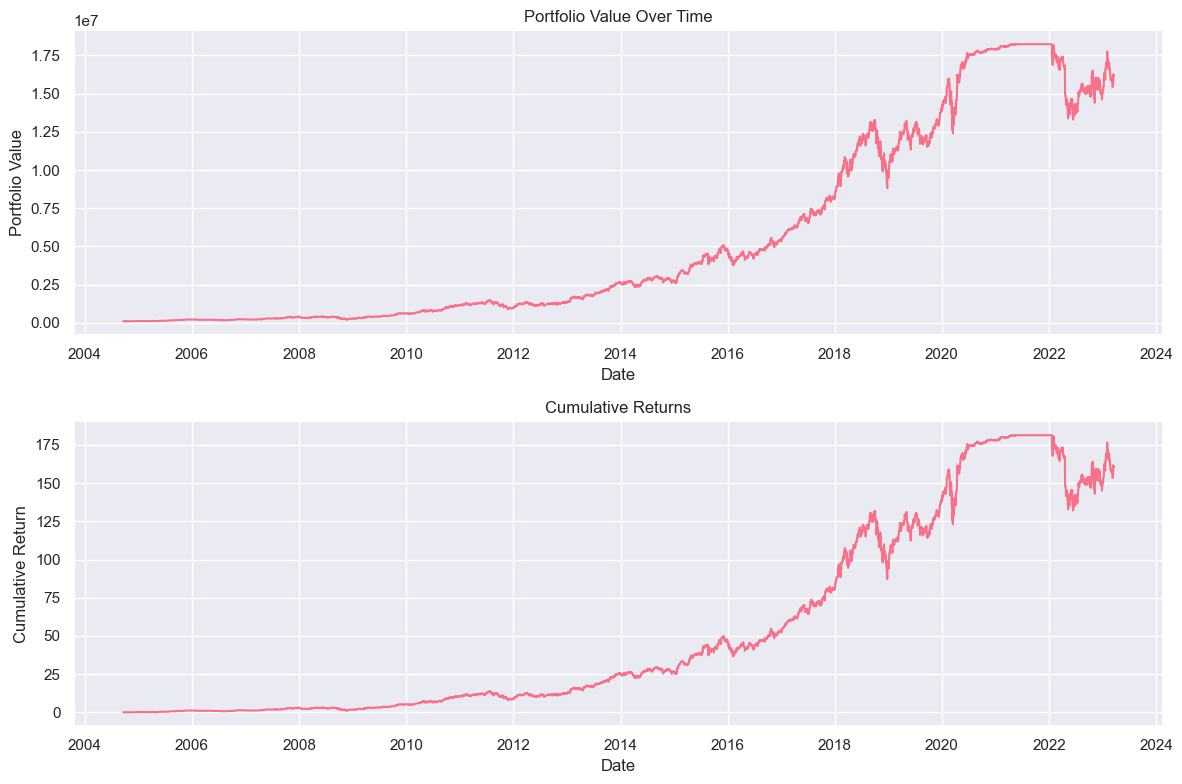


Processing customer 3 of 25...

Portfolio Recommendations for Customer 3:
------------------------
Age: 54
Risk Level: Low
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.80
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 12.25%
Amazon: 22.75%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.53%
Annual Volatility: 22.81%
Sharpe Ratio: 0.86

Plotting performance for Customer 3...


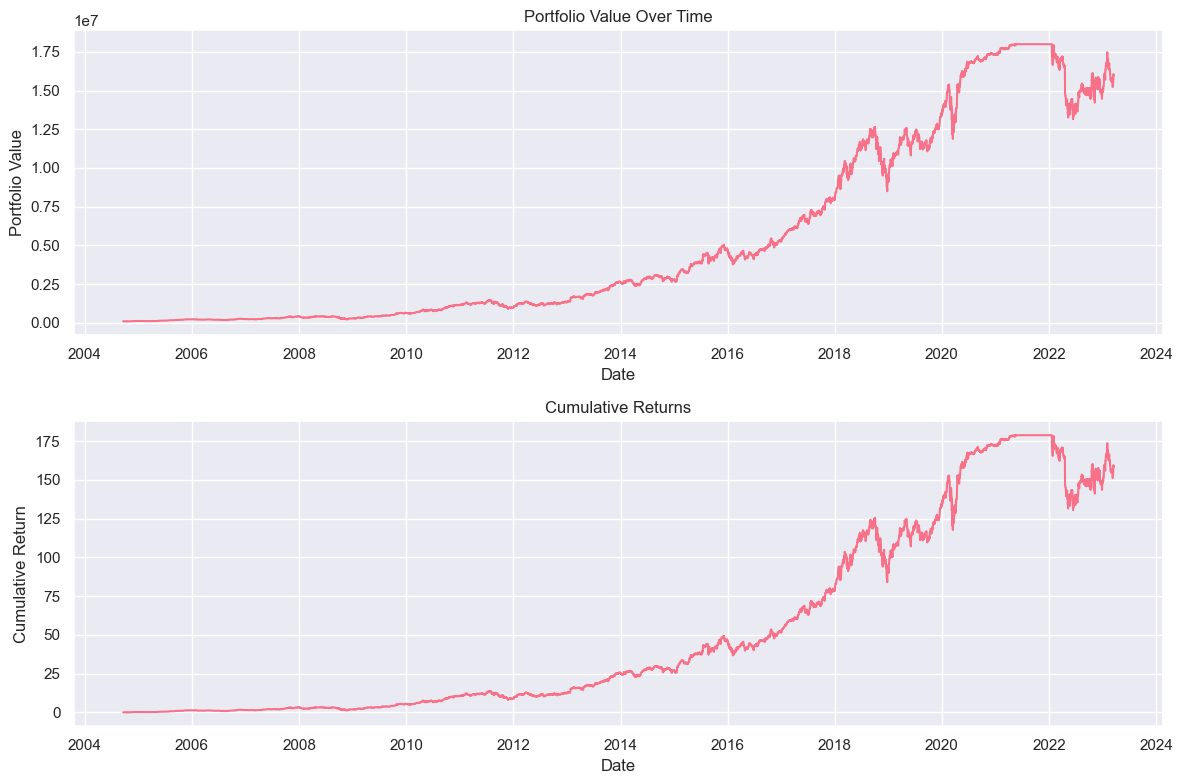


Processing customer 4 of 25...

Portfolio Recommendations for Customer 4:
------------------------
Age: 67
Risk Level: Low
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.80
Maximum Weight Used: 20.00%

Asset Allocation:
Apple: 20.00%
Microsoft: 20.00%
Google: 20.00%
Amazon: 20.00%
Netflix: 20.00%

Expected Performance:
Annual Return: 18.77%
Annual Volatility: 20.16%
Sharpe Ratio: 0.83

Plotting performance for Customer 4...


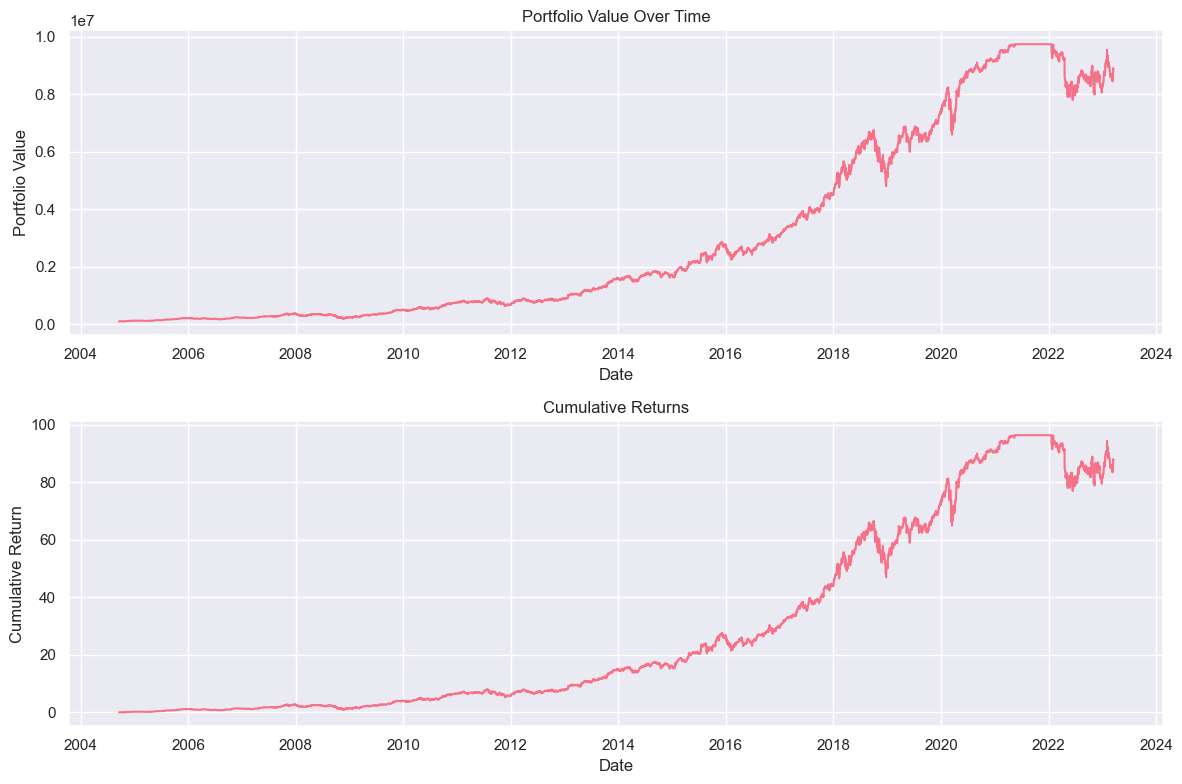


Processing customer 5 of 25...

Portfolio Recommendations for Customer 5:
------------------------
Age: 41
Risk Level: High
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.40
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: 0.00%
Amazon: 0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 5...


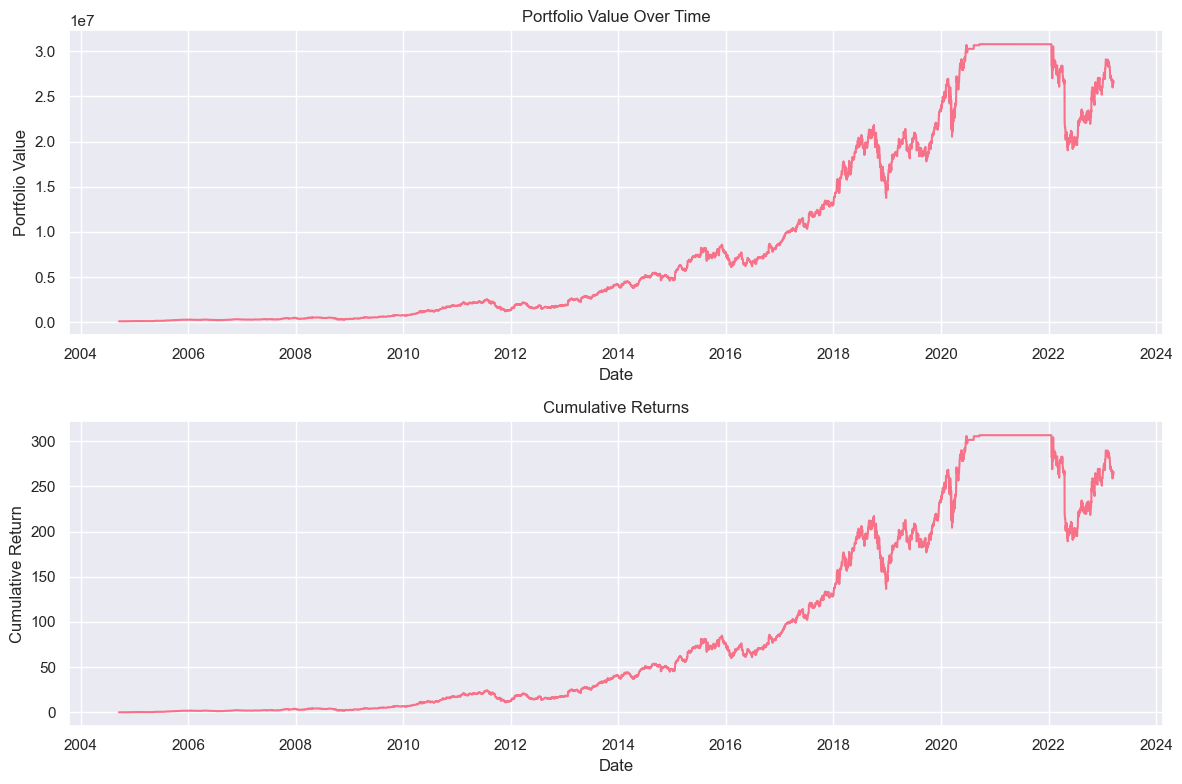


Processing customer 6 of 25...

Portfolio Recommendations for Customer 6:
------------------------
Age: 41
Risk Level: High
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.20
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: -0.00%
Amazon: -0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 6...


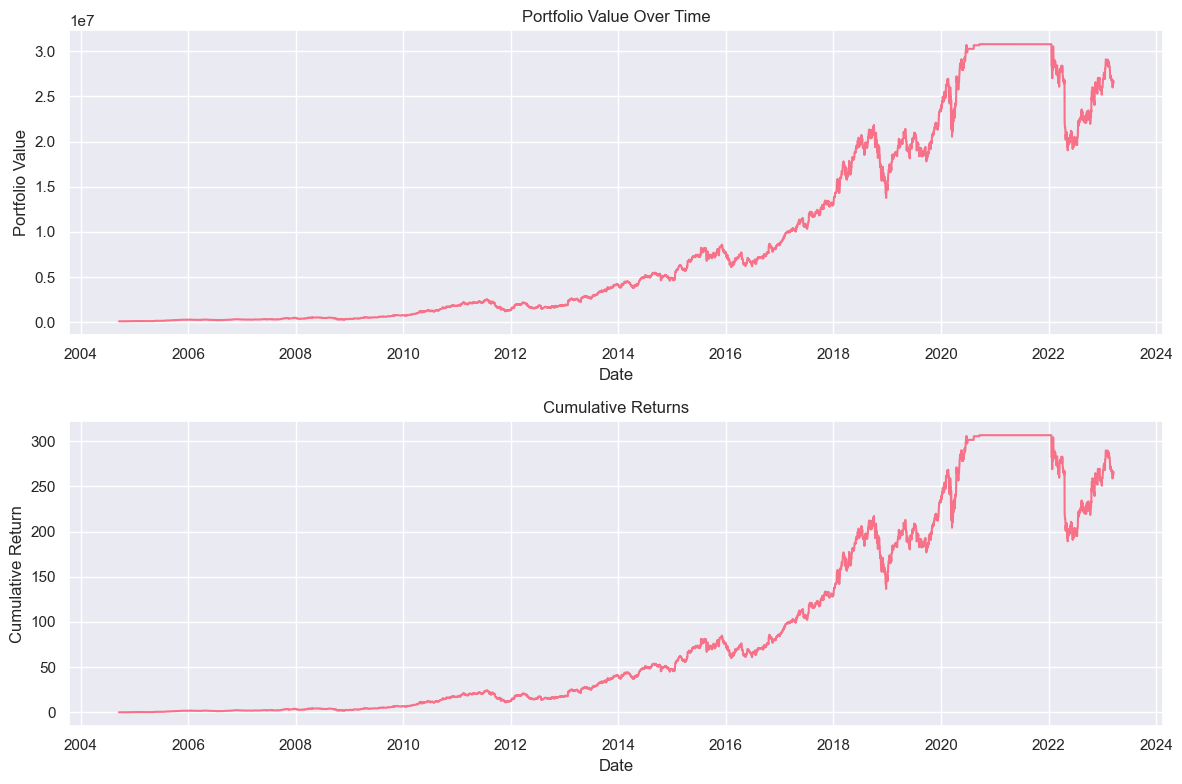


Processing customer 7 of 25...

Portfolio Recommendations for Customer 7:
------------------------
Age: 68
Risk Level: Low
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.80
Maximum Weight Used: 20.00%

Asset Allocation:
Apple: 20.00%
Microsoft: 20.00%
Google: 20.00%
Amazon: 20.00%
Netflix: 20.00%

Expected Performance:
Annual Return: 18.77%
Annual Volatility: 20.16%
Sharpe Ratio: 0.83

Plotting performance for Customer 7...


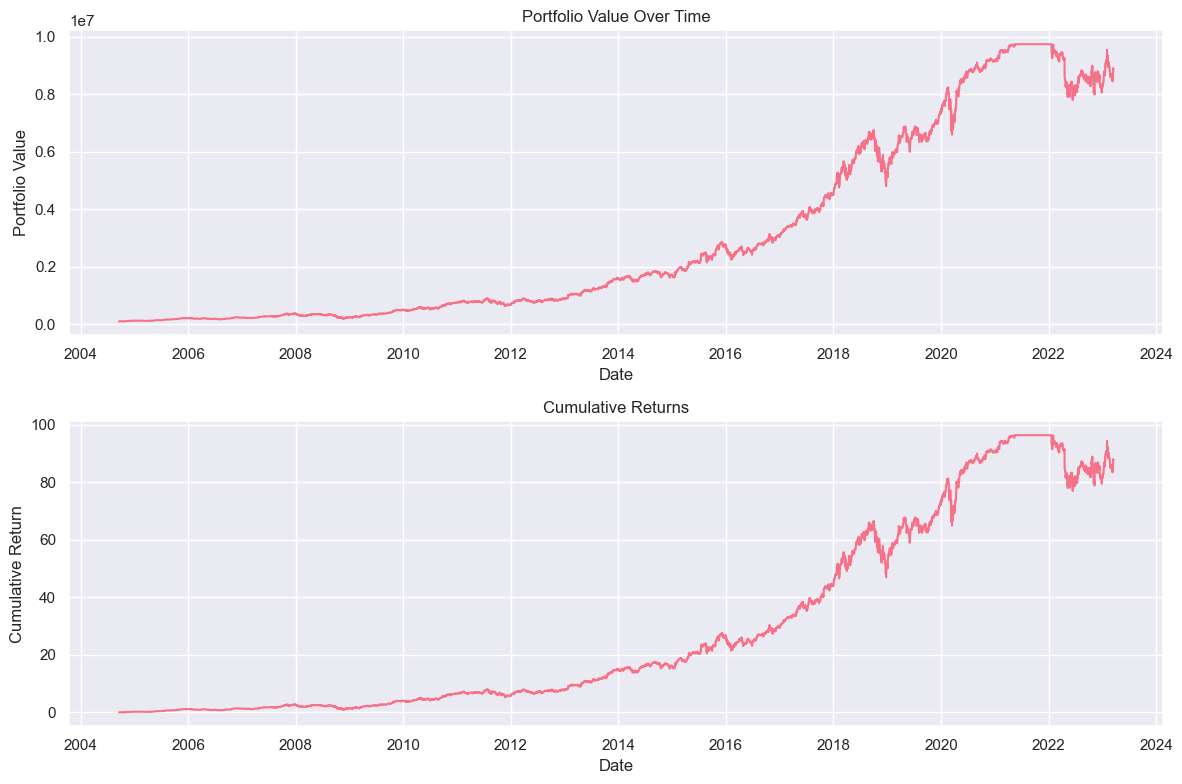


Processing customer 8 of 25...

Portfolio Recommendations for Customer 8:
------------------------
Age: 56
Risk Level: Medium
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.50
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: 0.00%
Google: -0.00%
Amazon: 20.00%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.46%
Annual Volatility: 25.39%
Sharpe Ratio: 0.85

Plotting performance for Customer 8...


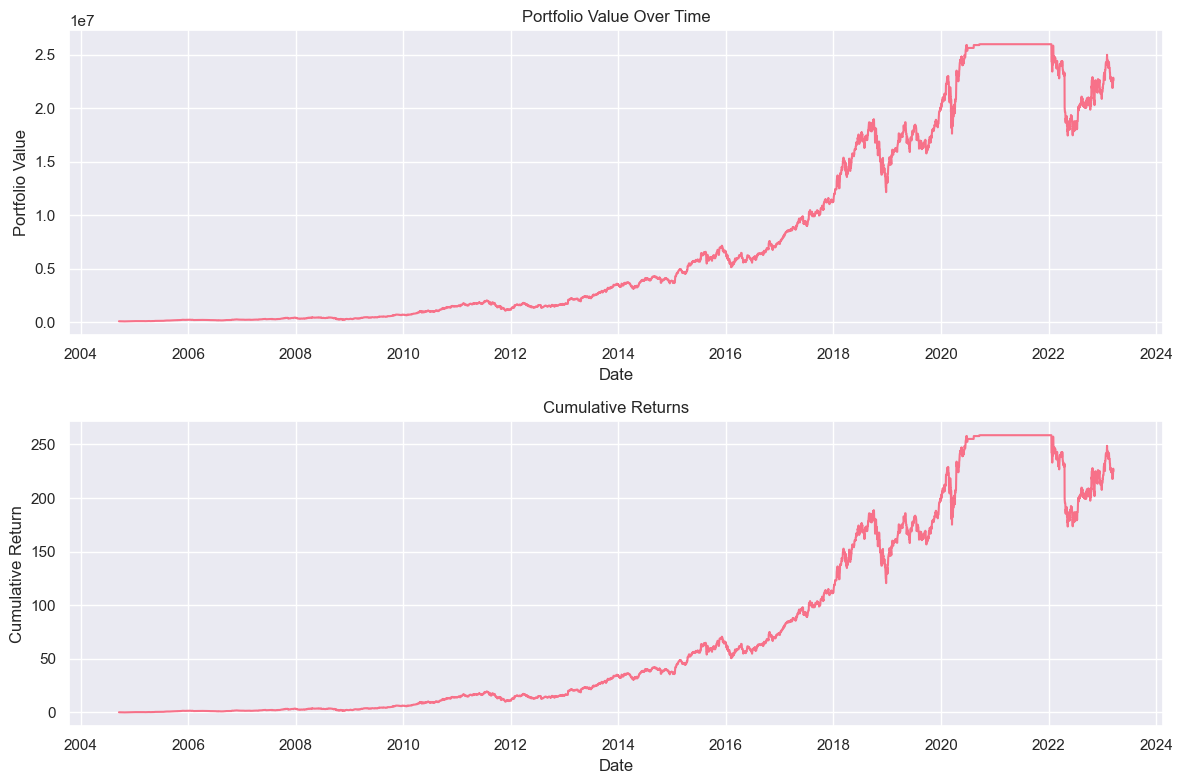


Processing customer 9 of 25...

Portfolio Recommendations for Customer 9:
------------------------
Age: 37
Risk Level: Medium
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.30
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: 0.00%
Google: 0.00%
Amazon: 20.00%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.46%
Annual Volatility: 25.39%
Sharpe Ratio: 0.85

Plotting performance for Customer 9...


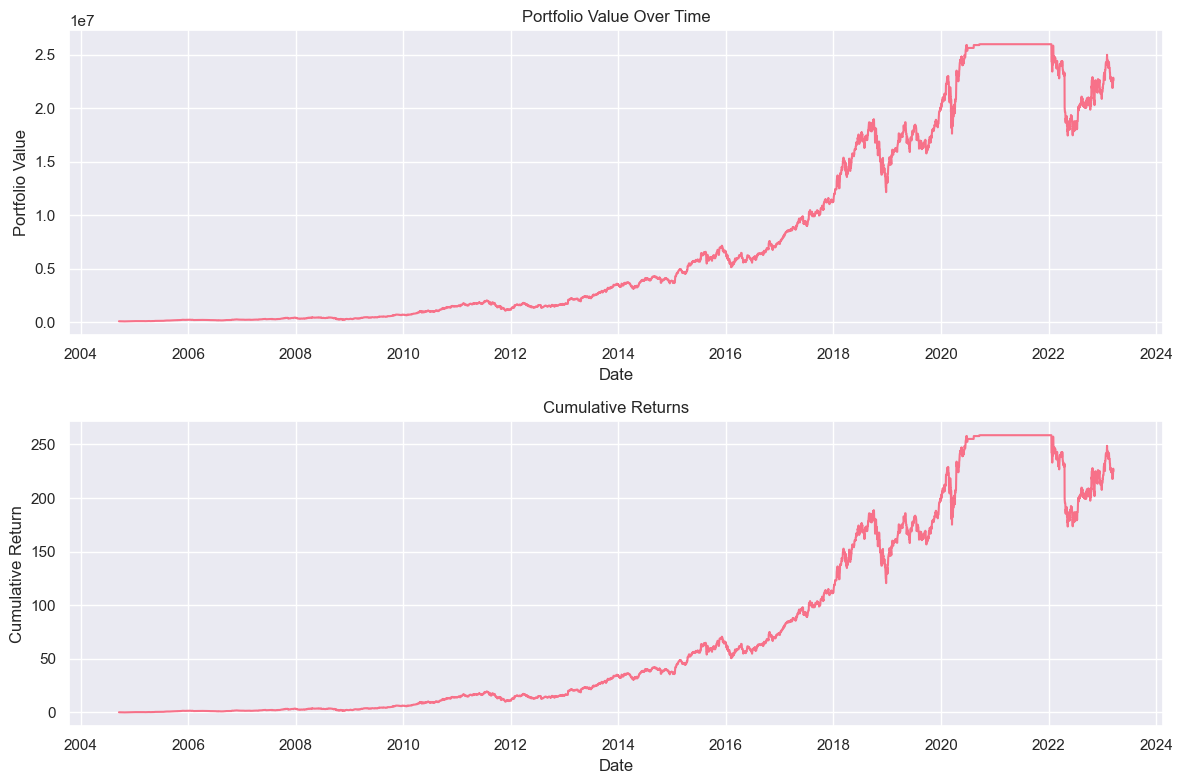


Processing customer 10 of 25...

Portfolio Recommendations for Customer 10:
------------------------
Age: 53
Risk Level: Low
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.80
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 12.25%
Amazon: 22.75%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.53%
Annual Volatility: 22.81%
Sharpe Ratio: 0.86

Plotting performance for Customer 10...


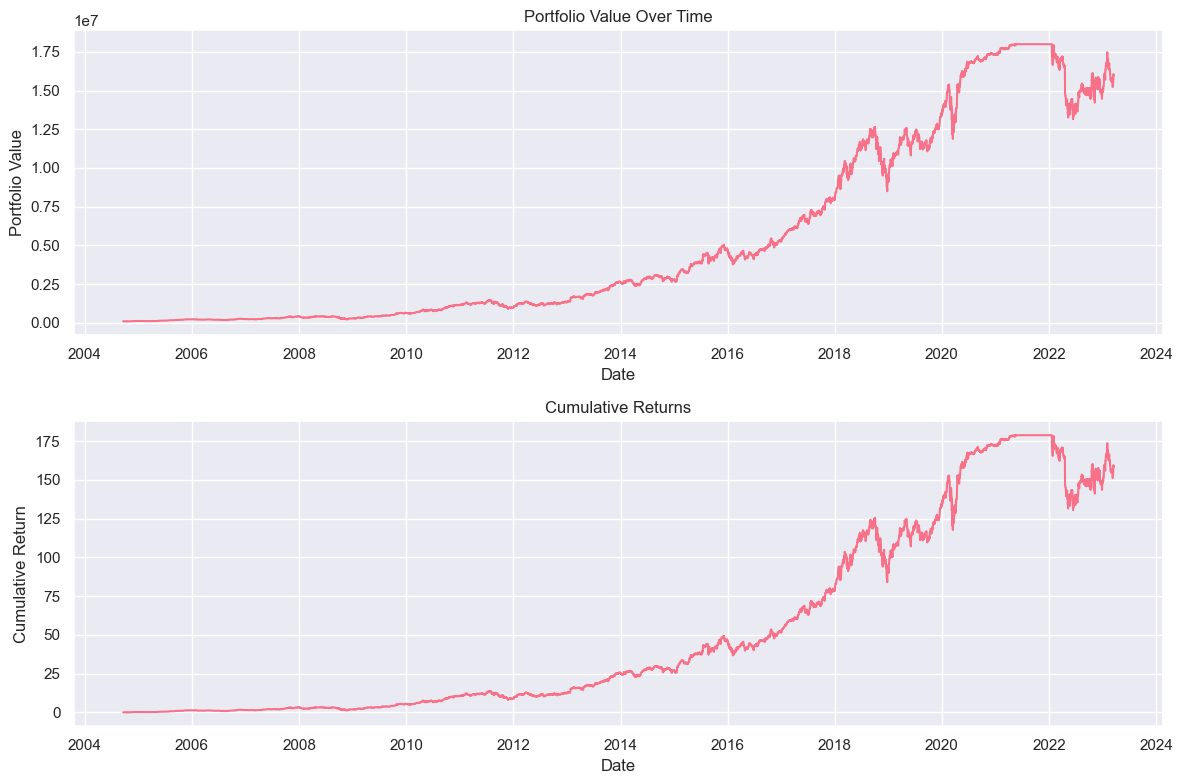


Processing customer 11 of 25...

Portfolio Recommendations for Customer 11:
------------------------
Age: 38
Risk Level: Low
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.60
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 6.00%
Amazon: 29.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.68%
Annual Volatility: 23.29%
Sharpe Ratio: 0.84

Plotting performance for Customer 11...


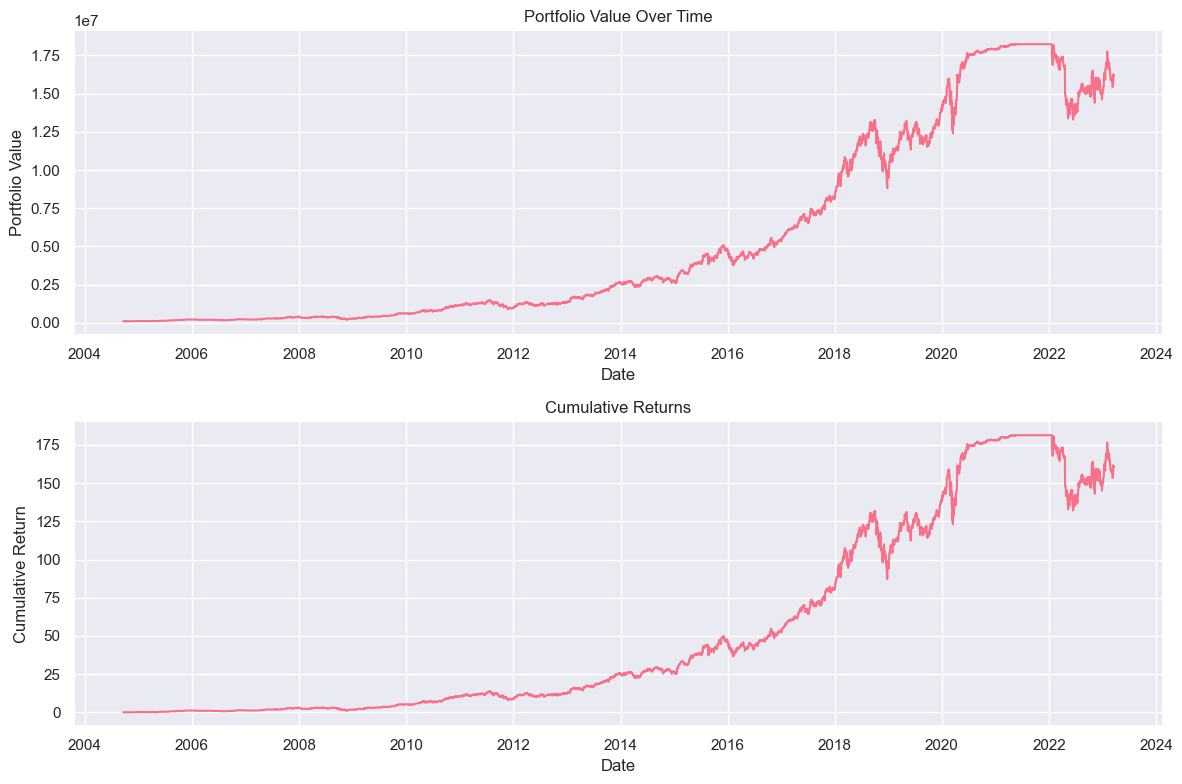


Processing customer 12 of 25...

Portfolio Recommendations for Customer 12:
------------------------
Age: 38
Risk Level: Medium
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.70
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: -0.00%
Google: 1.34%
Amazon: 18.66%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.43%
Annual Volatility: 25.29%
Sharpe Ratio: 0.85

Plotting performance for Customer 12...


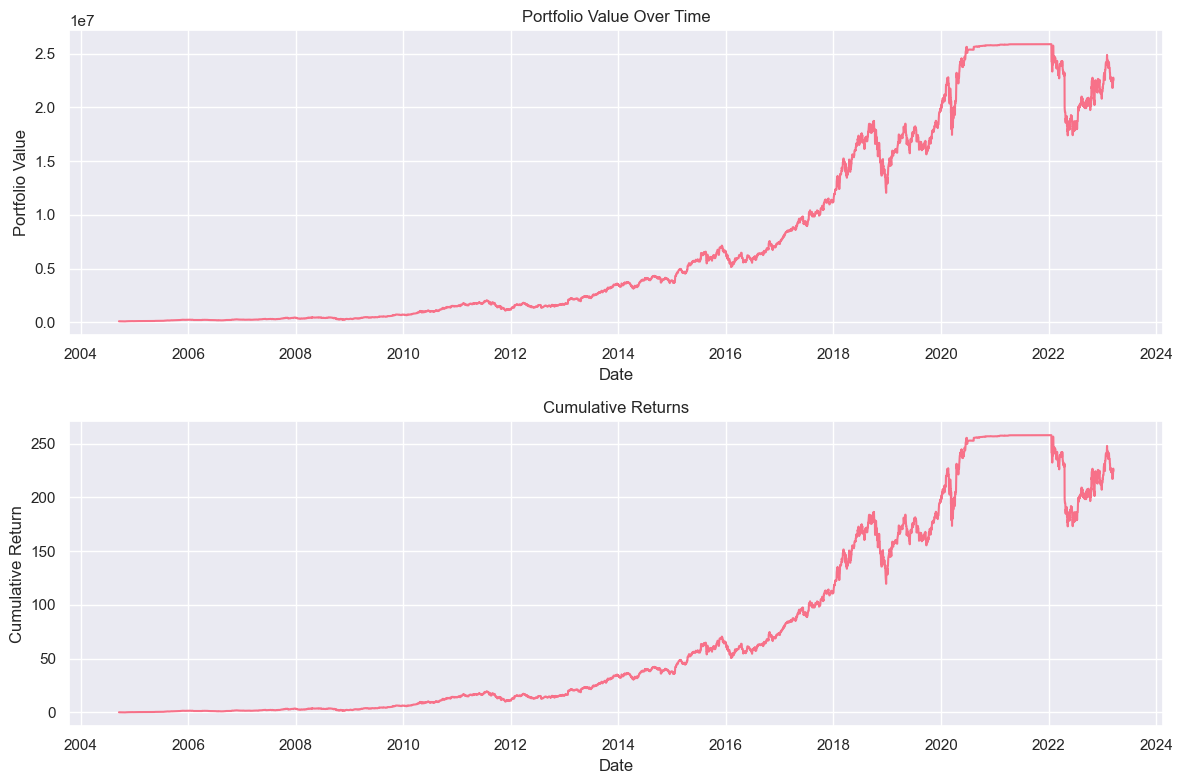


Processing customer 13 of 25...

Portfolio Recommendations for Customer 13:
------------------------
Age: 48
Risk Level: Medium
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.70
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: -0.00%
Google: 1.34%
Amazon: 18.66%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.43%
Annual Volatility: 25.29%
Sharpe Ratio: 0.85

Plotting performance for Customer 13...


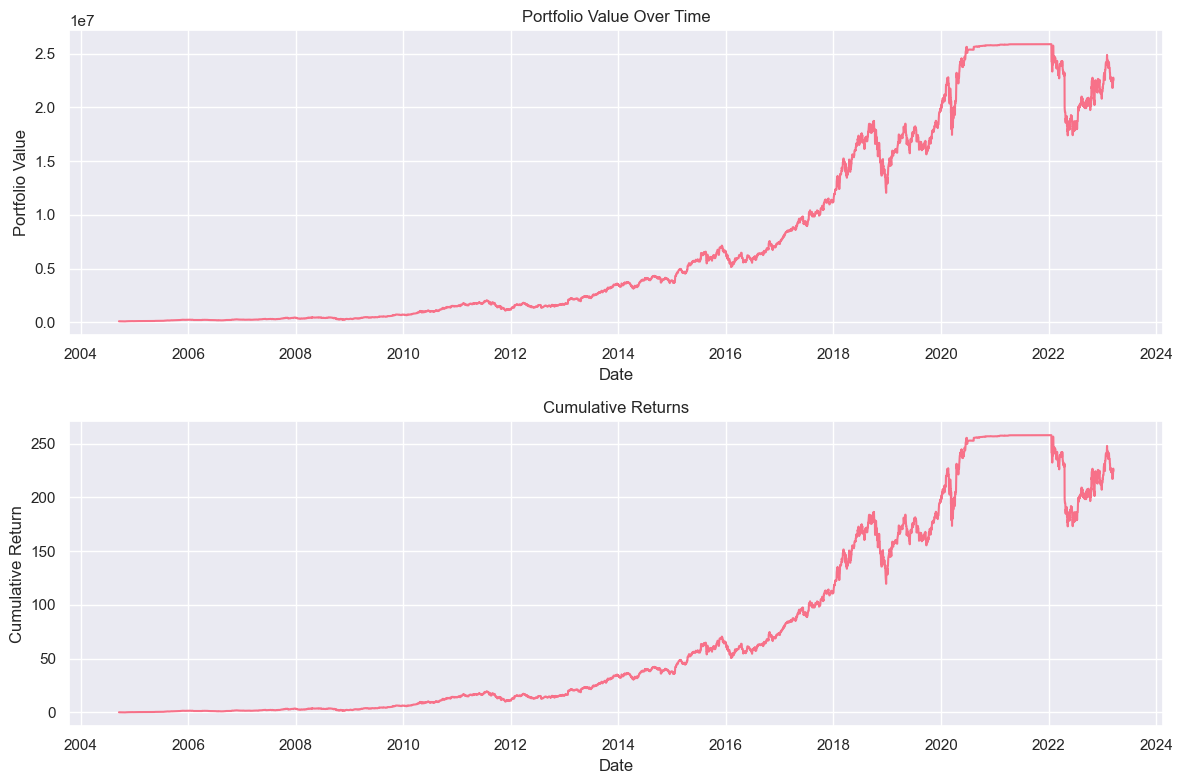


Processing customer 14 of 25...

Portfolio Recommendations for Customer 14:
------------------------
Age: 18
Risk Level: High
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.00
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: -0.00%
Google: 0.00%
Amazon: 0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 14...


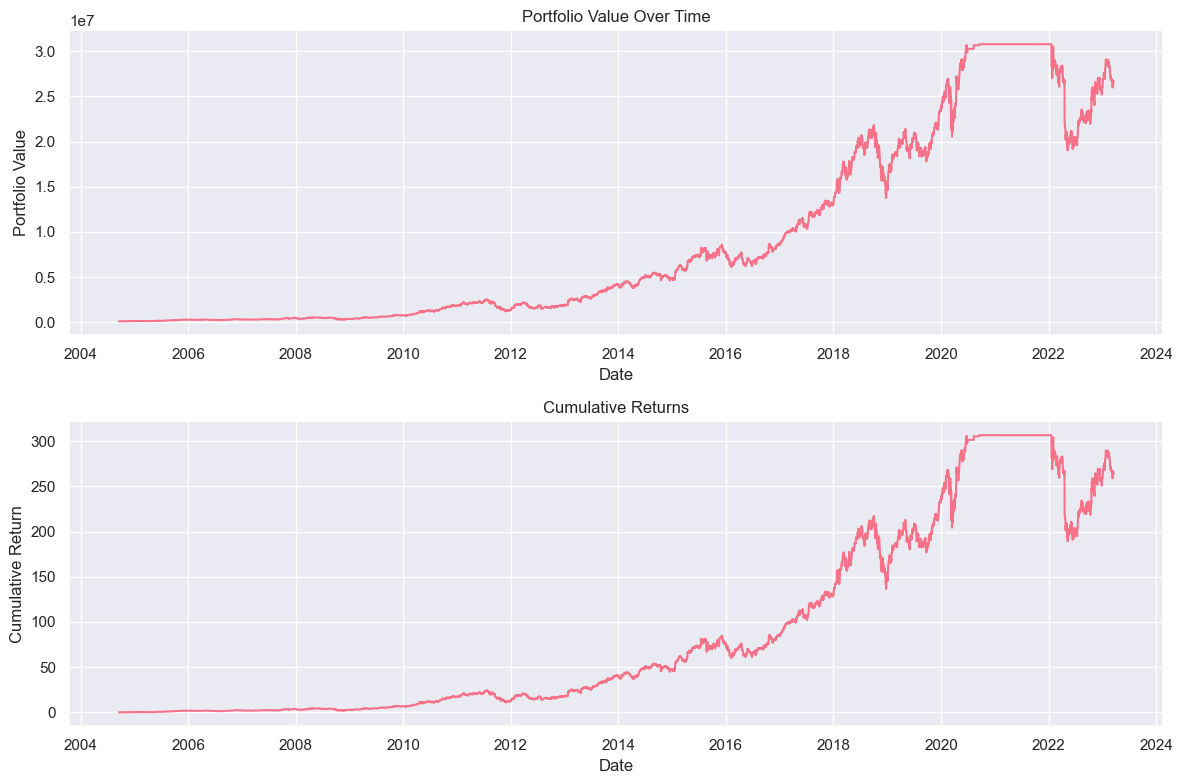


Processing customer 15 of 25...

Portfolio Recommendations for Customer 15:
------------------------
Age: 19
Risk Level: Medium
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.30
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: 0.00%
Amazon: 0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 15...


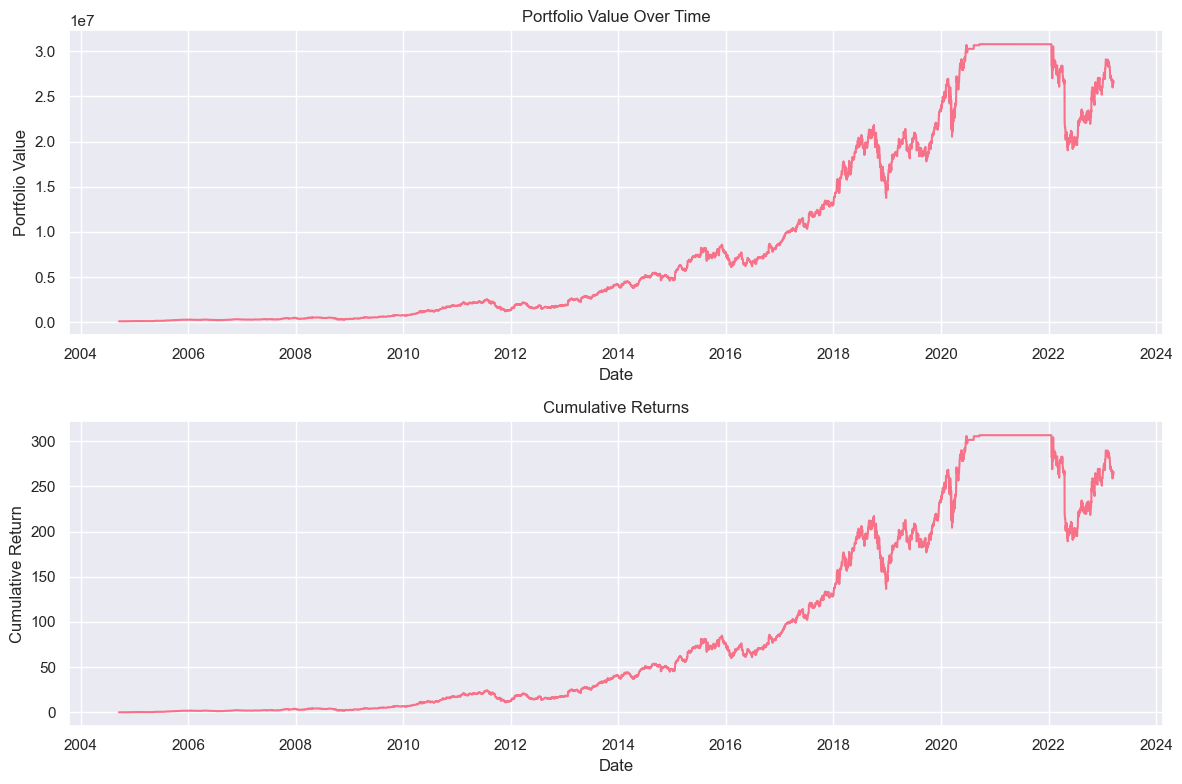


Processing customer 16 of 25...

Portfolio Recommendations for Customer 16:
------------------------
Age: 36
Risk Level: Low
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.60
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 6.00%
Amazon: 29.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.68%
Annual Volatility: 23.29%
Sharpe Ratio: 0.84

Plotting performance for Customer 16...


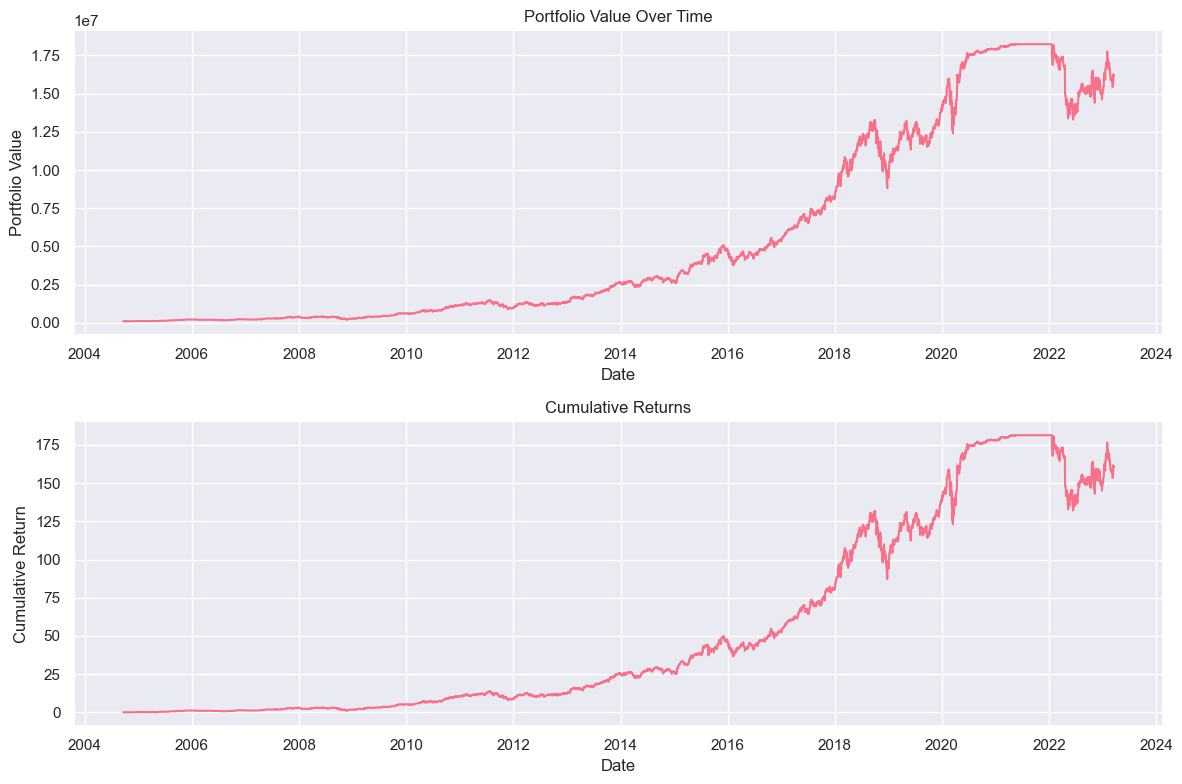


Processing customer 17 of 25...

Portfolio Recommendations for Customer 17:
------------------------
Age: 29
Risk Level: High
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.20
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: -0.00%
Amazon: -0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 17...


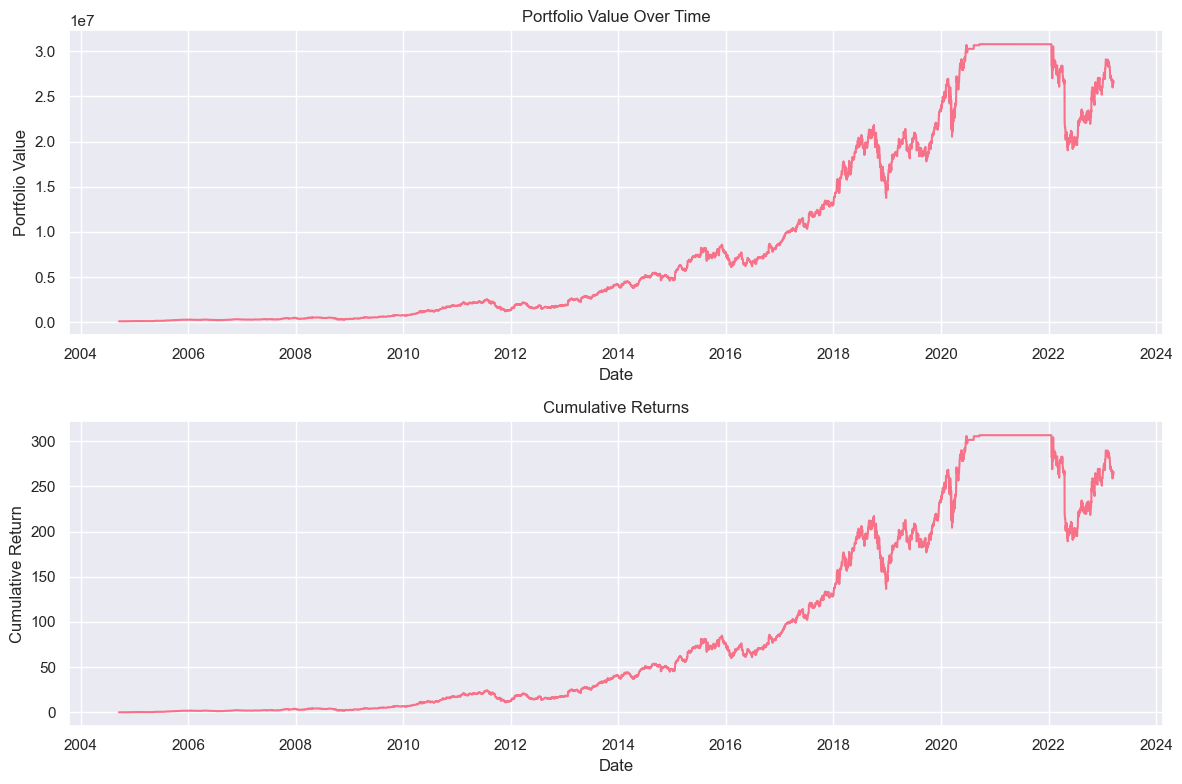


Processing customer 18 of 25...

Portfolio Recommendations for Customer 18:
------------------------
Age: 49
Risk Level: Low
Investment Horizon: Short-term
Adjusted Risk Tolerance: 1.00
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 16.00%
Amazon: 19.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.44%
Annual Volatility: 22.58%
Sharpe Ratio: 0.86

Plotting performance for Customer 18...


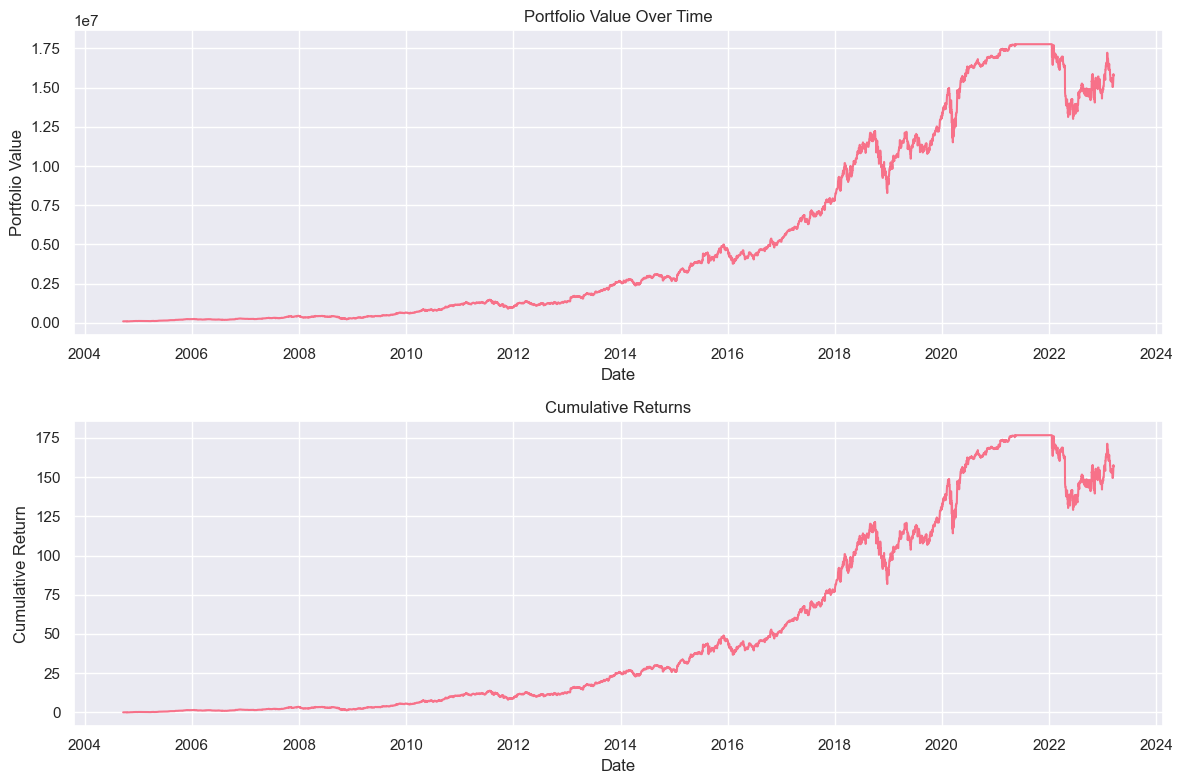


Processing customer 19 of 25...

Portfolio Recommendations for Customer 19:
------------------------
Age: 31
Risk Level: Low
Investment Horizon: Long-term
Adjusted Risk Tolerance: 0.60
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 5.00%
Google: 6.00%
Amazon: 29.00%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.68%
Annual Volatility: 23.29%
Sharpe Ratio: 0.84

Plotting performance for Customer 19...


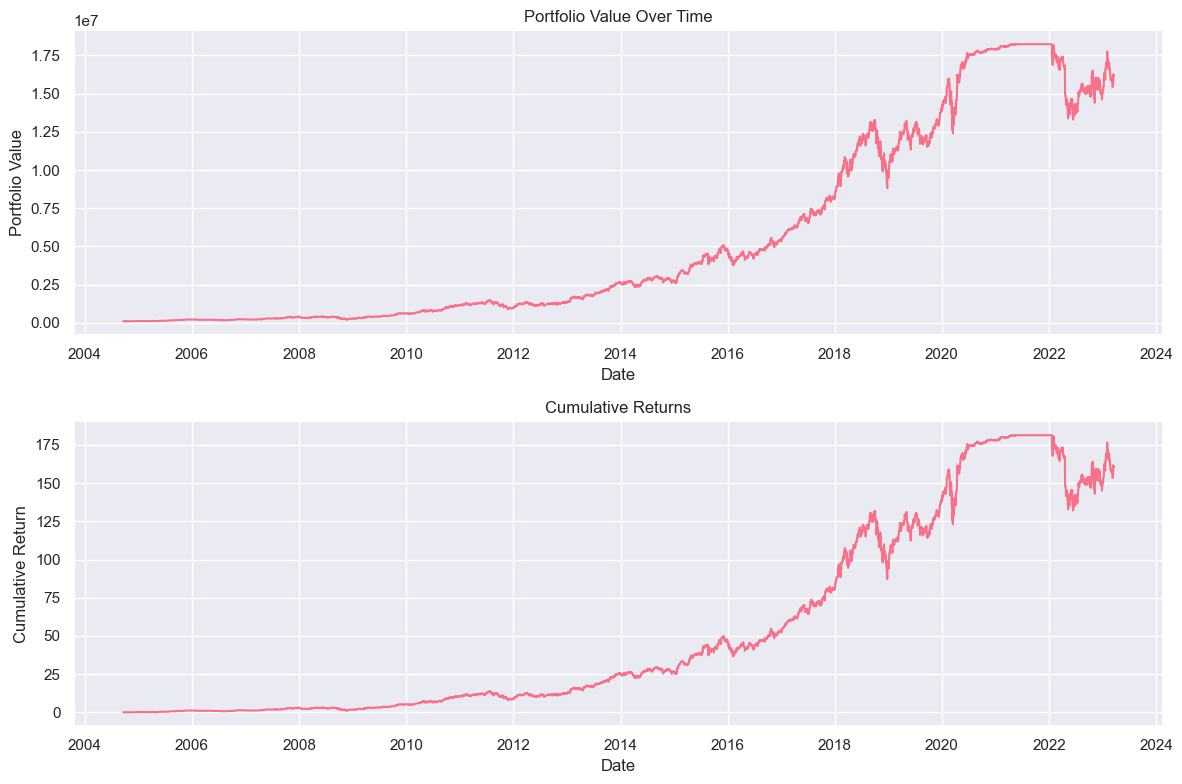


Processing customer 20 of 25...

Portfolio Recommendations for Customer 20:
------------------------
Age: 23
Risk Level: Medium
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.50
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: -0.00%
Google: 0.00%
Amazon: 0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 20...


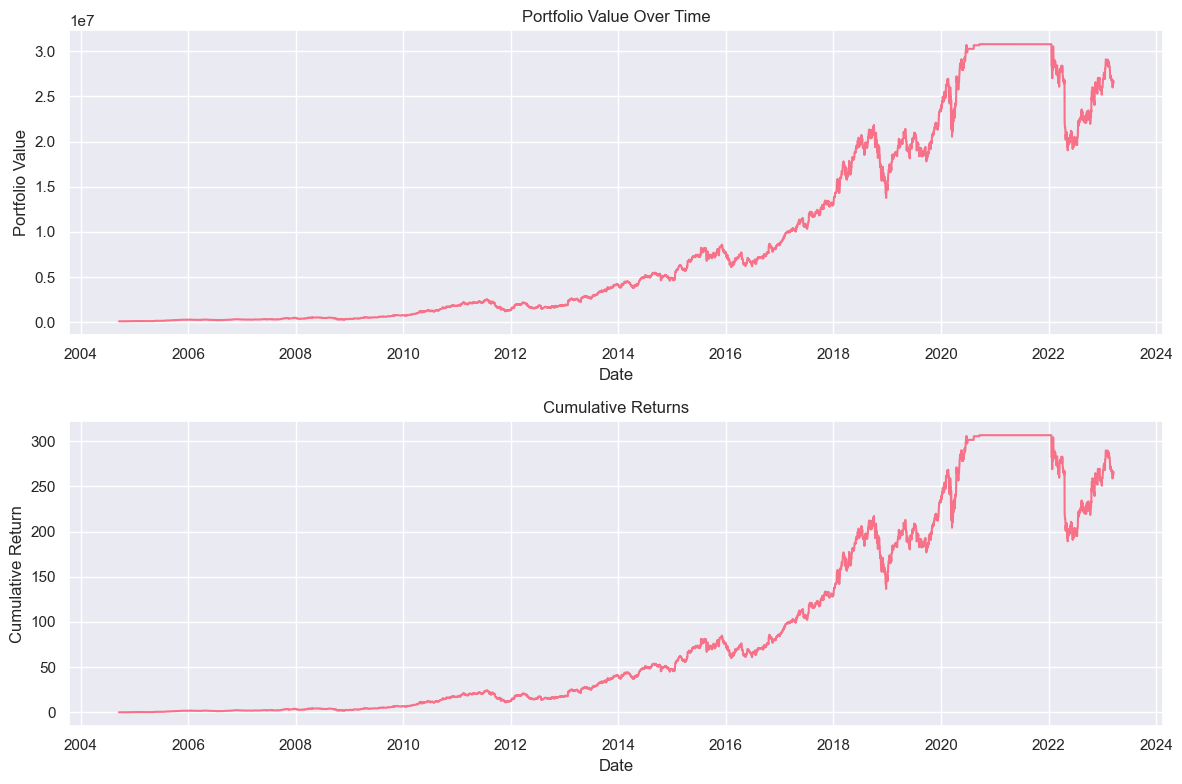


Processing customer 21 of 25...

Portfolio Recommendations for Customer 21:
------------------------
Age: 66
Risk Level: Medium
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.70
Maximum Weight Used: 30.00%

Asset Allocation:
Apple: 30.00%
Microsoft: 0.00%
Google: 12.64%
Amazon: 27.36%
Netflix: 30.00%

Expected Performance:
Annual Return: 21.99%
Annual Volatility: 23.40%
Sharpe Ratio: 0.85

Plotting performance for Customer 21...


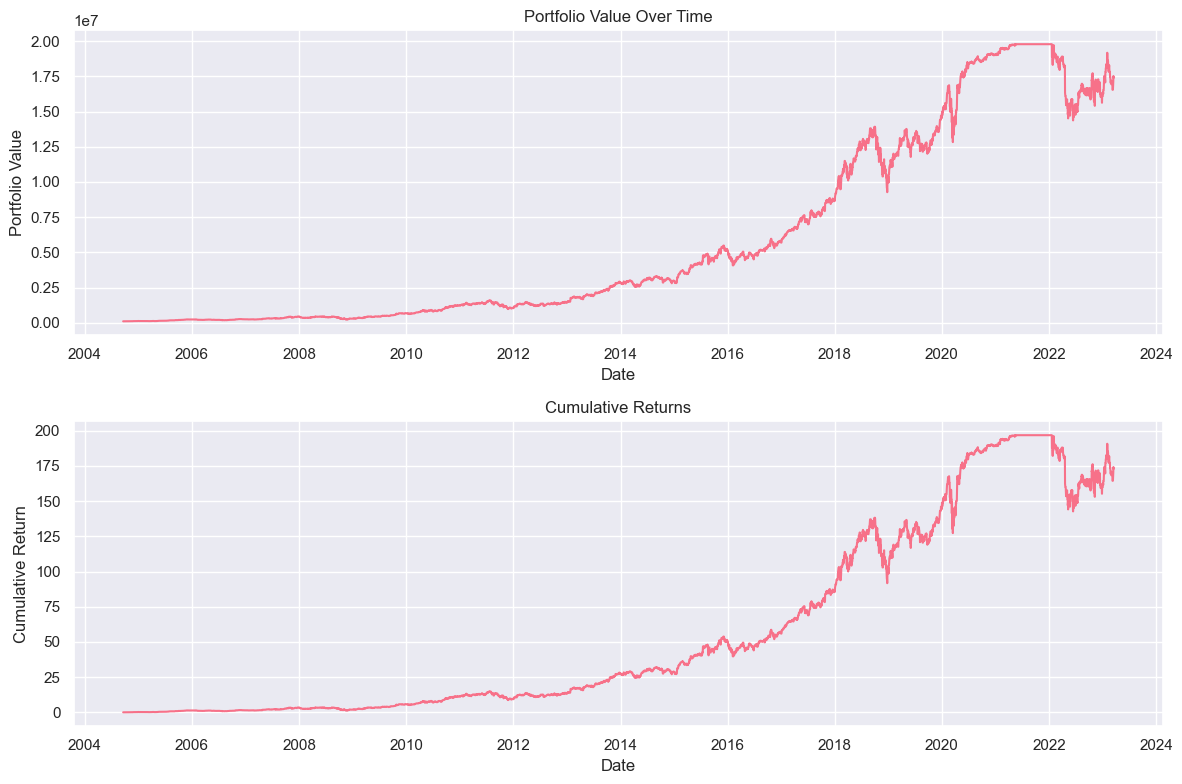


Processing customer 22 of 25...

Portfolio Recommendations for Customer 22:
------------------------
Age: 41
Risk Level: High
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.20
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: -0.00%
Amazon: -0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 22...


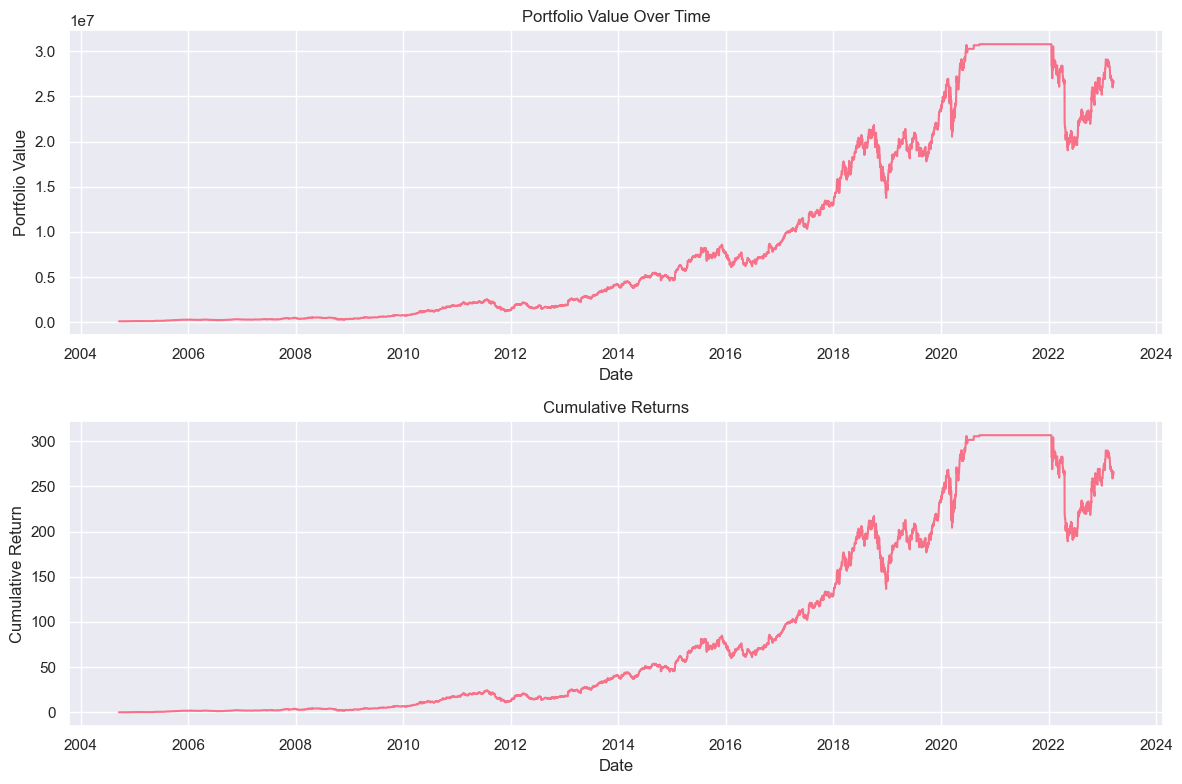


Processing customer 23 of 25...

Portfolio Recommendations for Customer 23:
------------------------
Age: 46
Risk Level: Medium
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.70
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: -0.00%
Google: 1.34%
Amazon: 18.66%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.43%
Annual Volatility: 25.29%
Sharpe Ratio: 0.85

Plotting performance for Customer 23...


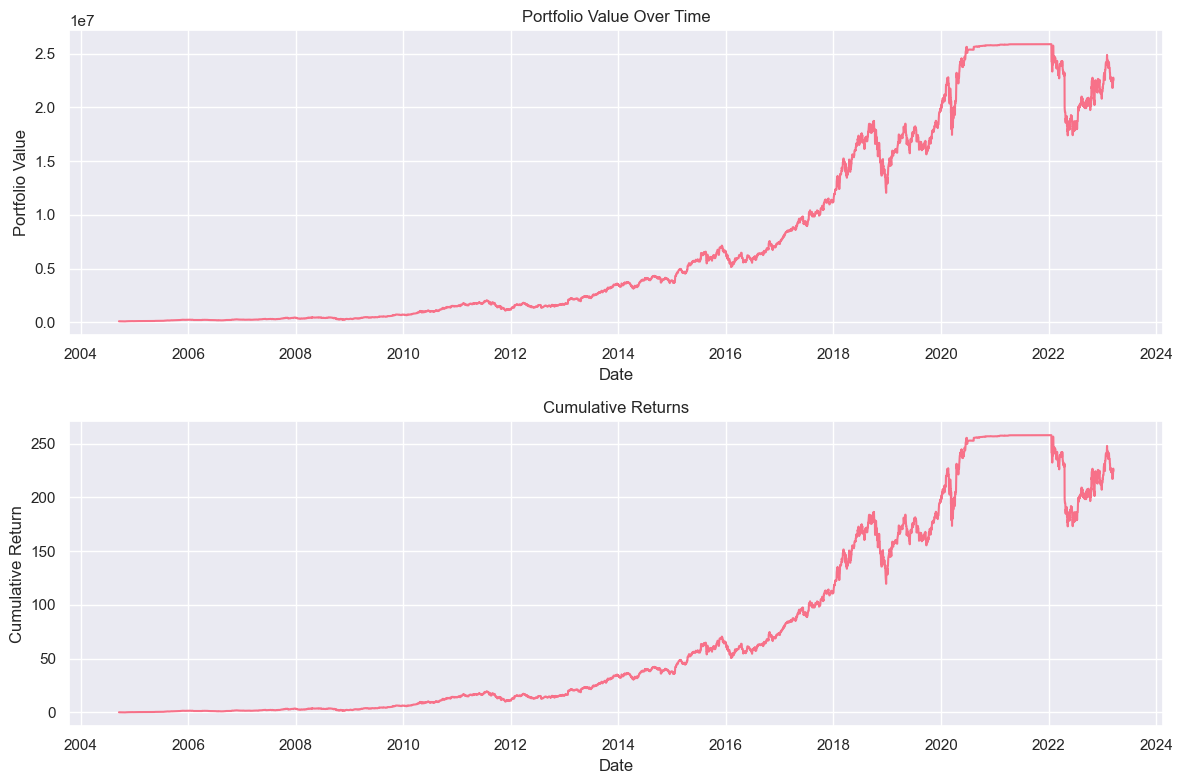


Processing customer 24 of 25...

Portfolio Recommendations for Customer 24:
------------------------
Age: 23
Risk Level: High
Investment Horizon: Medium-term
Adjusted Risk Tolerance: 0.20
Maximum Weight Used: 50.00%

Asset Allocation:
Apple: 50.00%
Microsoft: 0.00%
Google: -0.00%
Amazon: -0.00%
Netflix: 50.00%

Expected Performance:
Annual Return: 24.62%
Annual Volatility: 27.48%
Sharpe Ratio: 0.82

Plotting performance for Customer 24...


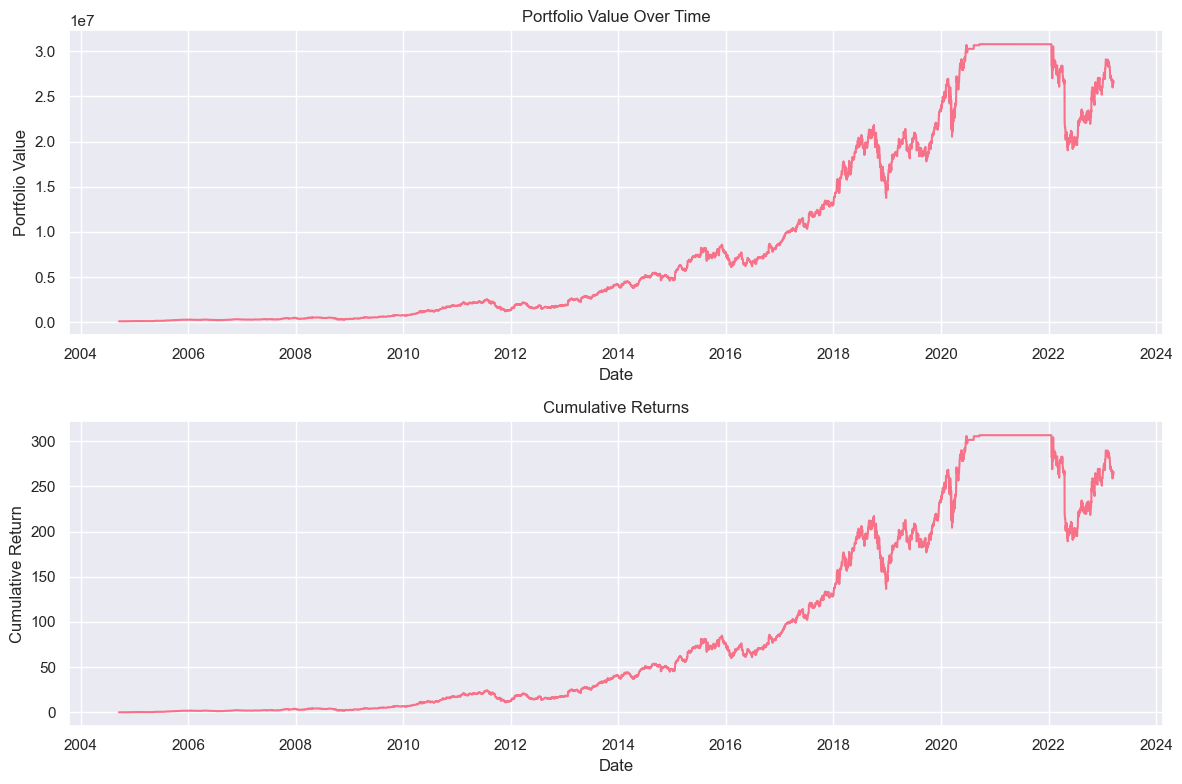


Processing customer 25 of 25...

Portfolio Recommendations for Customer 25:
------------------------
Age: 36
Risk Level: Medium
Investment Horizon: Short-term
Adjusted Risk Tolerance: 0.70
Maximum Weight Used: 40.00%

Asset Allocation:
Apple: 40.00%
Microsoft: -0.00%
Google: 1.34%
Amazon: 18.66%
Netflix: 40.00%

Expected Performance:
Annual Return: 23.43%
Annual Volatility: 25.29%
Sharpe Ratio: 0.85

Plotting performance for Customer 25...


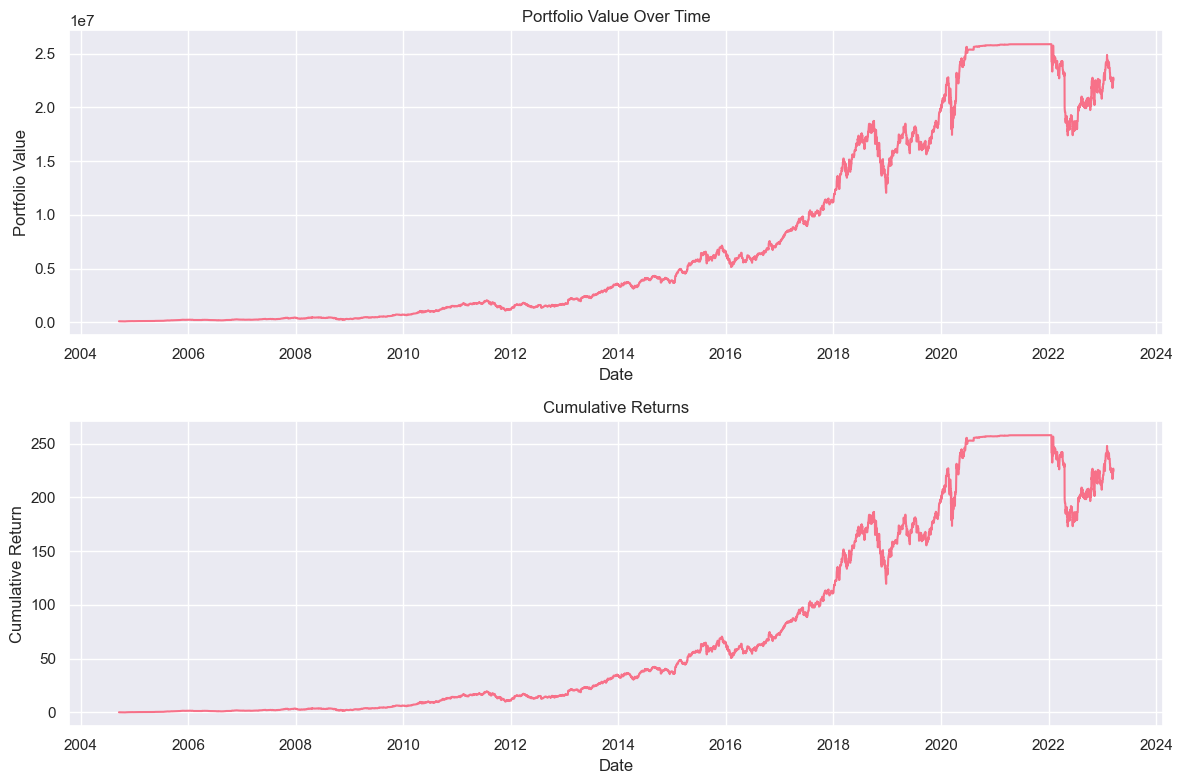


Successfully processed 25 out of 25 customers
Saved recommendations to data/portfolio_recommendations_25.csv

Recommendation Summary for 25 Customers:
--------------------------------------

Risk Level Distribution:
Low: 10 customers
Medium: 9 customers
High: 6 customers

Average Portfolio Metrics by Risk Level:
            expected_annual_return  expected_volatility  expected_sharpe_ratio
risk_level                                                                    
High                      0.246165             0.274823               0.822945
Low                       0.210447             0.224986               0.846172
Medium                    0.235387             0.255894               0.842168

Age Distribution:
<30: 5 customers
30-45: 10 customers
45-60: 7 customers
>60: 3 customers


In [15]:
class PortfolioOptimizer:
    def __init__(self, market_data: Dict[str, pd.DataFrame], risk_free_rate: float = 0.02):
        """
        Initialize the portfolio optimizer.
        
        Args:
            market_data: Dictionary of stock dataframes
            risk_free_rate: Annual risk-free rate (default: 2%)
        """
        self.market_data = market_data
        self.risk_free_rate = risk_free_rate
        self.returns_df = self._prepare_returns_data()
        self.mean_returns = self.returns_df.mean()
        self.cov_matrix = self.returns_df.cov()
        
    def _prepare_returns_data(self) -> pd.DataFrame:
        """Prepare returns data for optimization."""
        try:
            returns_dict = {}
            for stock, data in self.market_data.items():
                if 'daily_return' not in data.columns:
                    raise ValueError(f"daily_return column not found in {stock} data")
                
                # Remove any NaN values
                returns = data['daily_return'].dropna()
                if len(returns) == 0:
                    raise ValueError(f"No valid returns data for {stock}")
                
                returns_dict[stock] = returns
            
            # Create DataFrame and ensure all stocks have the same dates
            returns_df = pd.DataFrame(returns_dict)
            
            # Remove any rows with NaN values
            returns_df = returns_df.dropna()
            
            if len(returns_df) == 0:
                raise ValueError("No valid returns data after cleaning")
            
            print(f"Prepared returns data with shape: {returns_df.shape}")
            return returns_df
            
        except Exception as e:
            print(f"Error preparing returns data: {str(e)}")
            raise
    
    def optimize_portfolio(self, 
                         risk_tolerance: float,
                         budget: float,
                         min_weight: float = 0.0,
                         max_weight: float = 0.4) -> Tuple[np.ndarray, float, float]:
        """
        Optimize portfolio weights using mean-variance optimization.
        
        Args:
            risk_tolerance: Risk tolerance parameter (0 to 1)
            budget: Total investment budget
            min_weight: Minimum weight for any asset
            max_weight: Maximum weight for any asset
            
        Returns:
            Tuple of (optimal weights, expected return, expected risk)
        """
        try:
            # Validate input data
            if self.mean_returns is None or self.cov_matrix is None:
                raise ValueError("Mean returns or covariance matrix is not initialized")
            
            n_assets = len(self.market_data)
            if n_assets == 0:
                raise ValueError("No assets available for optimization")
            
            # Convert mean returns to numpy array if it's a pandas Series
            mean_returns = np.array(self.mean_returns)
            cov_matrix = np.array(self.cov_matrix)
            
            # Define variables
            weights = cp.Variable(n_assets)
            
            # Define constraints
            constraints = [
                cp.sum(weights) == 1,  # weights sum to 1
                weights >= min_weight,  # minimum weight constraint
                weights <= max_weight   # maximum weight constraint
            ]
            
            # Define objective function
            expected_return = mean_returns @ weights
            risk = cp.quad_form(weights, cov_matrix)
            
            # Combine return and risk in objective function
            objective = cp.Maximize(expected_return - risk_tolerance * risk)
            
            # Solve optimization problem
            problem = cp.Problem(objective, constraints)
            result = problem.solve()
            
            if problem.status not in ["optimal", "optimal_inaccurate"]:
                raise ValueError(f"Optimization failed with status: {problem.status}")
            
            # Calculate portfolio metrics
            optimal_weights = weights.value
            if optimal_weights is None:
                raise ValueError("Optimization did not produce valid weights")
            
            # Ensure we have valid numerical values
            portfolio_return = float(expected_return.value)
            portfolio_risk = float(np.sqrt(risk.value))
            
            # Validate the results
            if np.isnan(portfolio_return) or np.isnan(portfolio_risk):
                raise ValueError("Optimization produced invalid (NaN) results")
            
            return optimal_weights, portfolio_return, portfolio_risk
            
        except Exception as e:
            print(f"Error in portfolio optimization: {str(e)}")
            print(f"Mean returns shape: {self.mean_returns.shape if hasattr(self.mean_returns, 'shape') else 'N/A'}")
            print(f"Covariance matrix shape: {self.cov_matrix.shape if hasattr(self.cov_matrix, 'shape') else 'N/A'}")
            raise
    
    def calculate_portfolio_metrics(self, weights: np.ndarray) -> Dict[str, float]:
        """
        Calculate portfolio performance metrics.
        
        Args:
            weights: Portfolio weights
            
        Returns:
            Dictionary of portfolio metrics
        """
        try:
            # Validate weights
            if weights is None or len(weights) != len(self.market_data):
                raise ValueError("Invalid weights array")
            
            # Calculate portfolio returns
            portfolio_returns = self.returns_df @ weights
            
            # Calculate metrics
            annual_return = portfolio_returns.mean() * 252
            annual_volatility = portfolio_returns.std() * np.sqrt(252)
            sharpe_ratio = (annual_return - self.risk_free_rate) / annual_volatility
            
            # Calculate drawdown
            cumulative_returns = (1 + portfolio_returns).cumprod()
            rolling_max = cumulative_returns.expanding().max()
            drawdowns = (cumulative_returns - rolling_max) / rolling_max
            max_drawdown = drawdowns.min()
            
            return {
                'annual_return': annual_return,
                'annual_volatility': annual_volatility,
                'sharpe_ratio': sharpe_ratio,
                'max_drawdown': max_drawdown
            }
        except Exception as e:
            print(f"Error calculating portfolio metrics: {str(e)}")
            raise
    
    def backtest_portfolio(self, 
                         weights: np.ndarray,
                         initial_capital: float = 100000) -> pd.DataFrame:
        """
        Backtest portfolio performance.
        
        Args:
            weights: Portfolio weights
            initial_capital: Initial investment amount
            
        Returns:
            DataFrame with backtest results
        """
        try:
            # Validate weights
            if weights is None or len(weights) != len(self.market_data):
                raise ValueError("Invalid weights array")
            
            # Calculate portfolio returns
            portfolio_returns = self.returns_df @ weights
            
            # Calculate portfolio value over time
            portfolio_value = initial_capital * (1 + portfolio_returns).cumprod()
            
            # Create backtest results DataFrame
            backtest_results = pd.DataFrame({
                'Portfolio_Value': portfolio_value,
                'Daily_Return': portfolio_returns,
                'Cumulative_Return': (1 + portfolio_returns).cumprod() - 1
            })
            
            return backtest_results
        except Exception as e:
            print(f"Error in backtest: {str(e)}")
            raise
    
    def plot_portfolio_performance(self, backtest_results: pd.DataFrame):
        """Plot portfolio performance metrics."""
        try:
            if backtest_results is None or backtest_results.empty:
                raise ValueError("No backtest results to plot")
            
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
            
            # Plot portfolio value
            ax1.plot(backtest_results.index, backtest_results['Portfolio_Value'])
            ax1.set_title('Portfolio Value Over Time')
            ax1.set_xlabel('Date')
            ax1.set_ylabel('Portfolio Value')
            
            # Plot cumulative returns
            ax2.plot(backtest_results.index, backtest_results['Cumulative_Return'])
            ax2.set_title('Cumulative Returns')
            ax2.set_xlabel('Date')
            ax2.set_ylabel('Cumulative Return')
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting portfolio performance: {str(e)}")
            raise
    
    def generate_recommendations(self, 
                               customer_profile: pd.Series,
                               budget: float) -> Dict:
        """
        Generate investment recommendations based on customer profile.
        
        Args:
            customer_profile: Customer profile data
            budget: Investment budget
            
        Returns:
            Dictionary with investment recommendations
        """
        try:
            # Validate customer profile
            required_fields = ['risk_tolerance', 'investment_horizon', 'age', 'customer_id']
            missing_fields = [field for field in required_fields if field not in customer_profile]
            if missing_fields:
                raise ValueError(f"Missing required fields in customer profile: {missing_fields}")
            
            # Map risk tolerance to optimization parameters
            risk_tolerance_map = {
                'Low': {
                    'risk_tolerance': 0.8,
                    'max_weight': 0.3,  # More conservative allocation
                    'min_weight': 0.05  # Ensure some diversification
                },
                'Medium': {
                    'risk_tolerance': 0.5,
                    'max_weight': 0.4,
                    'min_weight': 0.0
                },
                'High': {
                    'risk_tolerance': 0.2,
                    'max_weight': 0.5,  # More aggressive allocation
                    'min_weight': 0.0
                }
            }
            
            # Validate risk tolerance
            if customer_profile['risk_tolerance'] not in risk_tolerance_map:
                raise ValueError(f"Invalid risk tolerance: {customer_profile['risk_tolerance']}")
            
            # Get risk parameters based on customer's risk tolerance
            risk_params = risk_tolerance_map[customer_profile['risk_tolerance']]
            
            # Adjust risk tolerance based on investment horizon
            horizon_adjustment = {
                'Short-term': 0.2,  # More conservative for short-term
                'Medium-term': 0.0,  # No adjustment
                'Long-term': -0.2    # More aggressive for long-term
            }
            
            # Validate investment horizon
            if customer_profile['investment_horizon'] not in horizon_adjustment:
                raise ValueError(f"Invalid investment horizon: {customer_profile['investment_horizon']}")
            
            adjusted_risk_tolerance = risk_params['risk_tolerance'] + horizon_adjustment[customer_profile['investment_horizon']]
            
            # Adjust max weight based on age
            age = customer_profile['age']
            if age < 30:
                max_weight_adjustment = 0.1  # More aggressive for younger investors
            elif age > 60:
                max_weight_adjustment = -0.1  # More conservative for older investors
            else:
                max_weight_adjustment = 0.0
            
            adjusted_max_weight = min(0.5, risk_params['max_weight'] + max_weight_adjustment)
            
            # Optimize portfolio with customer-specific parameters
            weights, expected_return, expected_risk = self.optimize_portfolio(
                risk_tolerance=adjusted_risk_tolerance,
                budget=budget,
                min_weight=risk_params['min_weight'],
                max_weight=adjusted_max_weight
            )
            
            # Calculate metrics
            metrics = self.calculate_portfolio_metrics(weights)
            
            # Generate recommendations
            recommendations = {
                'customer_id': customer_profile['customer_id'],
                'allocation': dict(zip(self.market_data.keys(), weights)),
                'expected_annual_return': metrics['annual_return'],
                'expected_volatility': metrics['annual_volatility'],
                'expected_sharpe_ratio': metrics['sharpe_ratio'],
                'risk_level': customer_profile['risk_tolerance'],
                'investment_horizon': customer_profile['investment_horizon'],
                'age': age,
                'adjusted_risk_tolerance': adjusted_risk_tolerance,
                'max_weight_used': adjusted_max_weight
            }
            
            return recommendations
        except Exception as e:
            print(f"Error generating recommendations: {str(e)}")
            raise

def main():
    try:
        # Load cleaned market data
        market_data = {}
        stocks = ['Apple', 'Microsoft', 'Google', 'Amazon', 'Netflix']
        
        print("Loading market data...")
        for stock in stocks:
            try:
                df = pd.read_csv(f'data/cleaned_{stock}.csv')
                
                # Validate required columns
                required_columns = ['Date', 'Adj Close', 'daily_return']
                missing_columns = [col for col in required_columns if col not in df.columns]
                if missing_columns:
                    raise ValueError(f"Missing required columns: {missing_columns}")
                
                # Convert date and set as index
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)
                
                # Validate data
                if df['daily_return'].isnull().all():
                    raise ValueError(f"No valid daily returns for {stock}")
                
                market_data[stock] = df
                print(f"Successfully loaded {stock} data with shape: {df.shape}")
                
            except Exception as e:
                print(f"Error loading {stock} data: {str(e)}")
                raise
        
        if not market_data:
            raise ValueError("No market data was successfully loaded")
        
        print("\nLoading customer profiles...")
        # Load customer profiles
        try:
            customer_profiles = pd.read_csv('data/cleaned_customer_profiles.csv')
            # Select only first 25 customers
            customer_profiles = customer_profiles.head(25)
            print(f"Successfully loaded 25 customer profiles")
            
            # Validate required columns in customer profiles
            required_columns = ['customer_id', 'age', 'risk_tolerance', 'investment_horizon', 'current_portfolio_value']
            missing_columns = [col for col in required_columns if col not in customer_profiles.columns]
            if missing_columns:
                raise ValueError(f"Missing required columns in customer profiles: {missing_columns}")
            
        except Exception as e:
            print(f"Error loading customer profiles: {str(e)}")
            raise
        
        print("\nInitializing optimizer...")
        # Initialize optimizer
        optimizer = PortfolioOptimizer(market_data)
        
        # Process each customer profile
        all_recommendations = []
        successful_recommendations = 0
        
        for idx, customer_profile in customer_profiles.iterrows():
            print(f"\nProcessing customer {idx + 1} of 25...")
            try:
                # Generate recommendations for this customer
                recommendations = optimizer.generate_recommendations(
                    customer_profile=customer_profile,
                    budget=customer_profile['current_portfolio_value']
                )
                
                all_recommendations.append(recommendations)
                successful_recommendations += 1
                
                # Print detailed recommendations for this customer
                print(f"\nPortfolio Recommendations for Customer {customer_profile['customer_id']}:")
                print("------------------------")
                print(f"Age: {customer_profile['age']}")
                print(f"Risk Level: {recommendations['risk_level']}")
                print(f"Investment Horizon: {recommendations['investment_horizon']}")
                print(f"Adjusted Risk Tolerance: {recommendations['adjusted_risk_tolerance']:.2f}")
                print(f"Maximum Weight Used: {recommendations['max_weight_used']:.2%}")
                print("\nAsset Allocation:")
                for asset, weight in recommendations['allocation'].items():
                    print(f"{asset}: {weight:.2%}")
                
                print("\nExpected Performance:")
                print(f"Annual Return: {recommendations['expected_annual_return']:.2%}")
                print(f"Annual Volatility: {recommendations['expected_volatility']:.2%}")
                print(f"Sharpe Ratio: {recommendations['expected_sharpe_ratio']:.2f}")
                
                # Backtest portfolio for this customer
                weights = np.array(list(recommendations['allocation'].values()))
                backtest_results = optimizer.backtest_portfolio(weights)
                
                # Plot performance for this customer
                print(f"\nPlotting performance for Customer {customer_profile['customer_id']}...")
                optimizer.plot_portfolio_performance(backtest_results)
                
            except Exception as e:
                print(f"Error processing customer {customer_profile['customer_id']}: {str(e)}")
                continue
        
        # Save all recommendations to a CSV file
        if all_recommendations:
            recommendations_df = pd.DataFrame(all_recommendations)
            recommendations_df.to_csv('data/portfolio_recommendations_25.csv', index=False)
            print(f"\nSuccessfully processed {successful_recommendations} out of 25 customers")
            print(f"Saved recommendations to data/portfolio_recommendations_25.csv")
            
            # Print summary statistics
            print("\nRecommendation Summary for 25 Customers:")
            print("--------------------------------------")
            print("\nRisk Level Distribution:")
            risk_levels = recommendations_df['risk_level'].value_counts()
            for level, count in risk_levels.items():
                print(f"{level}: {count} customers")
            
            print("\nAverage Portfolio Metrics by Risk Level:")
            metrics_by_risk = recommendations_df.groupby('risk_level').agg({
                'expected_annual_return': 'mean',
                'expected_volatility': 'mean',
                'expected_sharpe_ratio': 'mean'
            })
            print(metrics_by_risk)
            
            # Print age distribution
            print("\nAge Distribution:")
            age_groups = pd.cut(recommendations_df['age'], 
                              bins=[0, 30, 45, 60, 100], 
                              labels=['<30', '30-45', '45-60', '>60'])
            age_dist = age_groups.value_counts().sort_index()
            for age_group, count in age_dist.items():
                print(f"{age_group}: {count} customers")
        else:
            print("\nNo recommendations were generated successfully")
        
    except Exception as e:
        print(f"\nError in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main() 

##### Portfolio Optimization:
- Mean-variance optimization using CVXPY
- Risk tolerance-based optimization
- Budget and weight constraints
- Correlation-based risk management
##### Performance Metrics:
- Expected return and risk
- Sharpe ratio
- Maximum drawdown
- Cumulative returns
##### Backtesting:
- Historical performance simulation
- Portfolio value tracking
- Performance visualization
##### Customer-Specific Recommendations:
- Risk profile-based optimization
- Investment horizon consideration
- Budget constraints
- Detailed allocation recommendations